

#**Projeto FCD**
##**Turma de Graduação em Ciência de Dados 2024.1**
###Alunas: Gabrielly Xavier e Lívia Caroline



Para a execução correta desse Notebook, é necessário ter na mesma pasta de seu arquivo .ipynb os arquivos csv relacionados aos acidentes automotivos dos anos de 2016 a 2022. Eles se encontram com os nomes si-bol-ANO.csv nessa pasta do drive: https://drive.google.com/drive/folders/1IeWXY4PrWRrOG0YS02l16EaxcbpAW6fH?usp=drive_link

In [3]:
# Para executar no Colab, descomente abaixo
# ! pip install babypandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 94.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.5.3 which is incompatible.
xarray 2024.6.0 requires pandas>=2.0, but you have pandas 1.5.3 which is incompatible.


In [4]:
# Importações necessárias
import babypandas as bpd
import glob
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

df = bpd.DataFrame()

for f in glob.glob('*.csv'):
    print(f)
    aux = bpd.read_csv(f, sep=';')
    df = df.append(aux)


si-bol-2022.csv
si-bol-2019.csv
si-bol-2016.csv
si-bol-2017.csv
si-bol-2020.csv
si-bol-2018.csv
si-bol-2021.csv


In [5]:
# Vizualização para garantir que os dados foram carregados com sucesso
 # df

In [6]:
import pandas as pd

# Convertemos o texto do df em datas possíveis de serem valoradas como datas
data_correta = pd.to_datetime(
    df.get('data hora_boletim').values
)

In [7]:
df = df.assign(
    data_boletim = data_correta
)

In [8]:
# Removemos colunas que não iremos precisar
df = df.drop(
    columns=['data hora_boletim',
             'data_inclusao',
             'valor_ups',
             'valor_ups_antiga',
             'data_alteracao_smsa',
             'descricao_ups_antiga']
).sort_values(by='data_boletim').set_index('data_boletim')

**Problemas a serem resolvidos**

In [10]:
df

numero_boletim tipo_acidente  \
data_boletim                                            
2016-01-01 00:30:00  2016-008685542-001        H04000   
2016-01-01 01:00:00  2016-001865528-001        H06002   
2016-01-01 01:30:00  2016-014489036-001        H01002   
2016-01-01 02:55:00  2016-000009920-001        H01002   
2016-01-01 03:00:00  2016-000207284-001        H09002   
...                                 ...           ...   
2022-12-31 18:08:00  2022-057273258-001        H01002   
2022-12-31 20:16:00  2022-057287120-001        H09002   
2022-12-31 20:29:00  2022-057285174-001        H09002   
2022-12-31 20:50:00  2023-004511369-001        H09002   
2022-12-31 21:52:00  2022-057298812-001        H08002   

                                                    desc_tipo_acidente  \
data_boletim                                                             
2016-01-01 00:30:00  QUEDA DE PESSOA DE VEICULO                    ...   
2016-01-01 01:00:00  ATROPELAMENTO DE PESSOA SEM VITIMA FATAL      ...   
2016-01-01 01:30:00  ABALROAMENTO COM VITIMA                       ...   
2016-01-01 02:55:00  ABALROAMENTO COM VITIMA                       ...   
2016-01-01 03:00:00  COLISAO DE VEICULOS COM VITIMA                ...   
...                                                                ...   
2022-12-31 18:08:00  ABALROAMENTO COM VITIMA                       ...   
2022-12-31 20:16:00  COLISAO DE VEICULOS COM VITIMA                ...   
2022-12-31 20:29:00  COLISAO DE VEICULOS COM VITIMA                ...   
2022-12-31 20:50:00  COLISAO DE VEICULOS COM VITIMA                ...   
2022-12-31 21:52:00  CHOQUE MECANICO COM VITIMA                    ...   

                     cod_tempo       desc_tempo  cod_pavimento  \
data_boletim                                                     
2016-01-01 00:30:00          0  NAO INFORMADO                0   
2016-01-01 01:00:00          0  NAO INFORMADO                0   
2016-01-01 01:30:00          0  NAO INFORMADO                0   
2016-01-01 02:55:00          0  NAO INFORMADO                0   
2016-01-01 03:00:00          1  BOM                          1   
...                        ...              ...            ...   
2022-12-31 18:08:00          1  BOM                          1   
2022-12-31 20:16:00          0  NAO INFORMADO                0   
2022-12-31 20:29:00          0  NAO INFORMADO                0   
2022-12-31 20:50:00          0  NAO INFORMADO                0   
2022-12-31 21:52:00          2  CHUVA                        1   

                           pavimento  cod_regional    desc_regional  \
data_boletim                                                          
2016-01-01 00:30:00  NAO INFORMADO              21  NORDESTE          
2016-01-01 01:00:00  NAO INFORMADO              20  LESTE             
2016-01-01 01:30:00  NAO INFORMADO              23  NORTE             
2016-01-01 02:55:00  NAO INFORMADO              23  NORTE             
2016-01-01 03:00:00  ASFALTO                    19  CENTRO-SUL        
...                              ...           ...              ...   
2022-12-31 18:08:00  ASFALTO                    23  NORTE             
2022-12-31 20:16:00  NAO INFORMADO              19  CENTRO-SUL        
2022-12-31 20:29:00  NAO INFORMADO              20  LESTE             
2022-12-31 20:50:00  NAO INFORMADO              25  PAMPULHA          
2022-12-31 21:52:00  ASFALTO                    20  LESTE             

                      origem_boletim  ... coordenada_x  coordenada_y  \
data_boletim                          ...                              
2016-01-01 00:30:00  POLICIA CIVIL    ...    610820.43    7801707.67   
2016-01-01 01:00:00  POLICIA CIVIL    ...    616043.53    7799563.76   
2016-01-01 01:30:00  POLICIA CIVIL    ...    610686.91    7805465.91   
2016-01-01 02:55:00  POLICIA MILITAR  ...    610958.28    7806566.34   
2016-01-01 03:00:00  POLICIA CIVIL    ...    611496.74    7793765.15   
...                              

**1. Mapear colunas para os IDs corretos**

Não encontramos um objetivo claro na questão, pois as colunas que estão com códigos já vem seguidas de colunas com a descrição daquele código. Da mesma forma, não vimos porque trocar o valor das colunas de código, uma vez que para alguns casos, é melhor trabalharmos com códigos do que com strings. Ná dúvida, criamos vários novos dfs com a relação entre código e descrição, deixando claro qual código corresponde a qual descrição

In [11]:

def createDictionary(df, colunaKeys, colunaValues):
  '''Cria dicionário de valores a partir de duas colunas de um dataframe'''
  keys = df.get(colunaKeys).values
  values = df.get(colunaValues).values

  dictionary = {}
  for key, value in zip(keys, values):
      if key not in dictionary:
          dictionary[key] = value

  return dictionary

def createDF(df, coluna1, coluna2):
  '''Cria um novo dataframe a partir de um dicionário com duas colunas'''
  dictionary = createDictionary(df, coluna1, coluna2)
  DF = (
      bpd.DataFrame()
      .assign(
        Código = list(dictionary.keys()),
        Descrição = list(dictionary.values())
      )
      .sort_values('Código')
  )

  return DF

# Dataframe com os acidentes
TipoAcidentes = createDF(df, 'tipo_acidente', 'desc_tipo_acidente')

# Dataframe com os tempos
TipoTempo = createDF(df, 'cod_tempo', 'desc_tempo')

# Dataframe com os pavimentos
TipoPavimento = createDF(df, 'cod_pavimento', 'pavimento')

# Dataframe com as regionais
TipoRegional = createDF(df, 'cod_regional', 'desc_regional')

In [12]:
TipoAcidentes

Código                                          Descrição
2    H01002  ABALROAMENTO COM VITIMA                       ...
11   H02001  CAPOTAMENTO/TOMBAMENTO SEM VITIMA             ...
5    H02002  CAPOTAMENTO/TOMBAMENTO COM VITIMA             ...
9    H03002  QUEDA DE VEICULO COM VITIMA                   ...
0    H04000  QUEDA DE PESSOA DE VEICULO                    ...
..      ...                                                ...
1    H06002  ATROPELAMENTO DE PESSOA SEM VITIMA FATAL      ...
10   H07002  ATROPELAMENTO DE ANIMAL COM VITIMA            ...
4    H08002  CHOQUE MECANICO COM VITIMA                    ...
3    H09002  COLISAO DE VEICULOS COM VITIMA                ...
6    H99002  OUTROS COM VITIMA                             ...

[12 rows x 2 columns]

In [13]:
TipoTempo

Código        Descrição
0       0  NAO INFORMADO  
1       1  BOM            
2       2  CHUVA          
4       3  NEBLINA        
3       4  NUBLADO

In [14]:
TipoPavimento

Código        Descrição
0       0  NAO INFORMADO  
1       1  ASFALTO        
3       2  CONCRETO       
4       3  TERRA          
2       4  CALCAMENTO

In [15]:
TipoRegional

Código        Descrição
6       0                 
9      18  BARREIRO       
3      19  CENTRO-SUL     
1      20  LESTE          
0      21  NORDESTE       
5      22  NOROESTE       
2      23  NORTE          
4      24  OESTE          
7      25  PAMPULHA       
8      26  VENDA NOVA

**2. Faça um gráfico de linhas por ano mês indicando o número de acidentes naquele ano mês**

Entendendo que deveríamos agrupar todos os casos de acidentes por ano e por mês, em um só groupby, foi isso que fizemos. Primeiramente, procurei os nomes das colunas para evitar erros, então utilizei o size no agrupamento. Achei interessante que o size, diferente do count, deixa apenas 1 coluna no dataframe, facilitando o processo de plotagem.

In [16]:
df.columns

Index(['numero_boletim', 'tipo_acidente', 'desc_tipo_acidente', 'cod_tempo',
       'desc_tempo', 'cod_pavimento', 'pavimento', 'cod_regional',
       'desc_regional', 'origem_boletim', 'local_sinalizado',
       'velocidade_permitida', 'coordenada_x', 'coordenada_y',
       'hora_informada', 'indicador_fatalidade', 'descricao_ups', 'ano', 'mes',
       'lat', 'lon', 'bairro'],
      dtype='object')

<Axes: title={'center': 'Frequência de acidentes por ano/mês'}, xlabel='Ano/Mês', ylabel='Frequência'>

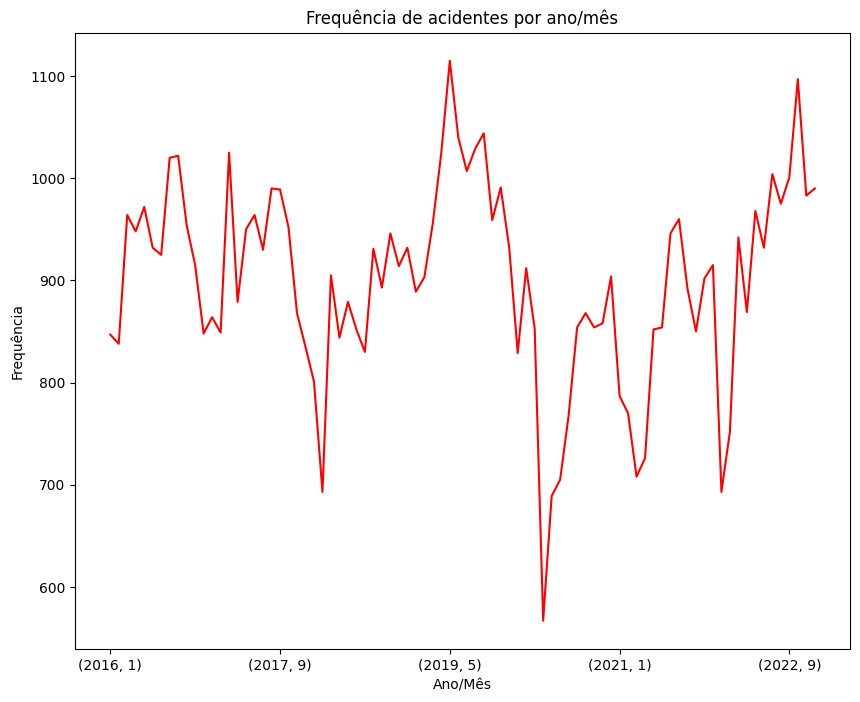

In [17]:
dfYearMonth = df.groupby(['ano','mes']).size()

dfYearMonth.plot(
    kind = 'line',
    color='red',
    ylabel = 'Frequência',
    xlabel = 'Ano/Mês',
    title = 'Frequência de acidentes por ano/mês',
    legend = False,
    figsize = (10,8)
)

**3. Repita o gráfico acima por ano apenas**

Fizemos o mesmo que na questão 2, porém dessa vez agrupamos os casos apenas por ano, ignorando o mês.

<Axes: title={'center': 'Frequência de acidentes por ano'}, xlabel='Ano', ylabel='Frequência'>

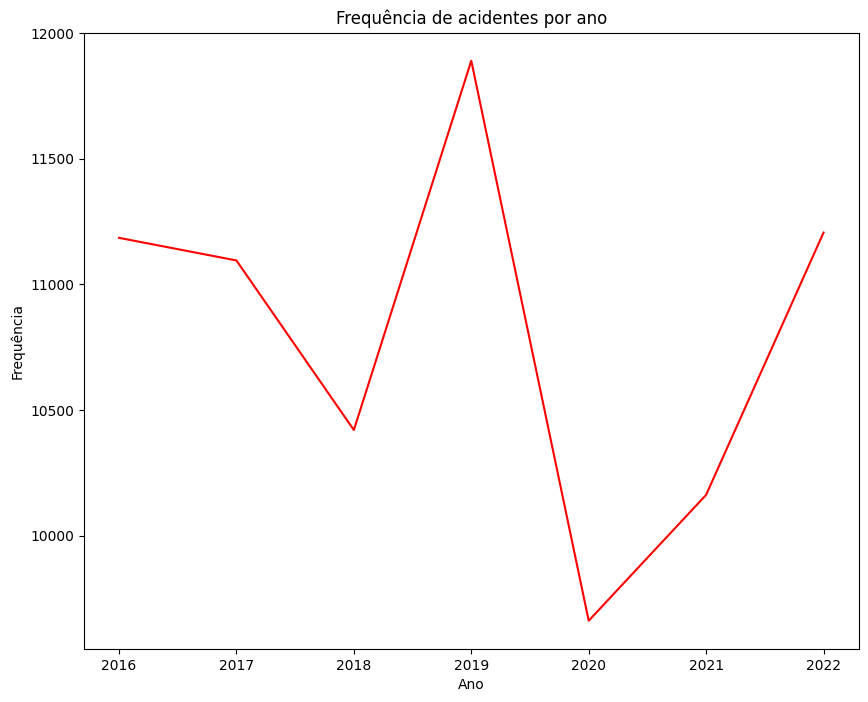

In [18]:
dfYearMonth = df.groupby('ano').size()

dfYearMonth.plot(
    kind = 'line',
    color='red',
    ylabel = 'Frequência',
    xlabel = 'Ano',
    title = 'Frequência de acidentes por ano',
    legend = False,
    figsize = (10,8)
)

**4. Faça um gráfico de barras por ano indicandos os tipos de acidentes mais comuns no ano**

De acordo com a questão, o que devemos fazer é encontrar os acidentes mais recorrentes em cada um dos anos (no caso, considerei os 3 mais recorrentes) e plotar todos esses tipos de acidentes e anos em um só gráfico. Uma outra opção seria separar os casos por ano, plotando um gráfico para cada ano - para ficar mais visual - e, pensando nisso, também fizemos essa opção.  

In [19]:
# Funções para as próximas questões

# Criação de novo df com colunas de nomes genéricos c1, c2 e c3, todas vazias
def novo3df():
  "Criação de novo df com colunas de nomes genéricos c1, c2 e c3, todas vazias"
  newdf = bpd.DataFrame().assign(
    c1 = [],
    c2 = [],
    c3 = []
  )
  return newdf

def topPlotagem(category, orderByType, mainColumn, otherColumn1, otherColumn2, title, eixoY):
  "Plotagem de um gráfico organizado pelos mais recorrentes em relação a algum parâmetro"

  # Crio um dataframe novo para armazenar os "top acidentes"
  newdf = novo3df()

  # Para cada elemento da lista da categoria em questão vou repetir o processo
  for each in category:
    # Crio um df ordenado para pegar os mais recorrentes
    dfOrdenado = orderByType[orderByType.get(mainColumn) == each]

    for i in range(0,3):
      # Para o top 3, coloco no novo df
      cat1 = dfOrdenado.iloc[i].get(otherColumn1)
      cat2 = dfOrdenado.iloc[i].get(otherColumn2)
      newLine = bpd.DataFrame().assign(
          c1 = [each],
          c2 = [cat1],
          c3 = [cat2]
      )
      newdf = newdf.append(newLine).reset_index(drop=True)

  # Finalmente, faço a plotagem
  newdf = newdf.set_index(['c1', 'c2'])
  newdf.iloc[::-1].plot(
    kind = 'barh',
    color='red',
    ylabel = eixoY,
    xlabel = otherColumn2,
    title = title,
    legend = False,
    figsize = (10,8)
  )


# Plotando um gráfico por ano/mês/bairro/etc
def topPlotagemDetalhada(category, orderByType, mainColumn, otherColumn1, otherColumn2, title, eixoY):
  "Plotagem dos mais recorrentes em relação a algum parâmetro, mas agora separando em cada elemento da categoria"
  for each in category:
    dfOrdenado = orderByType[orderByType.get(mainColumn) == each]
    newdf = novo3df()

    for i in range(0,3):
      # Para o top 3, coloco no novo df
      cat1 = dfOrdenado.iloc[i].get(otherColumn1)
      cat2 = dfOrdenado.iloc[i].get(otherColumn2)
      newLine = bpd.DataFrame().assign(
          c1 = [each],
          c2 = [cat1],
          c3 = [cat2]
      )
      newdf = newdf.append(newLine).reset_index(drop=True)
    newdf = newdf.drop(columns = 'c1').set_index(['c2'])
    newdf.iloc[::-1].plot(
      kind = 'barh',
      color='red',
      ylabel = eixoY,
      xlabel = otherColumn2,
      title = title + f'$ {each} $',
      legend = False,
      figsize = (5,3)
    )


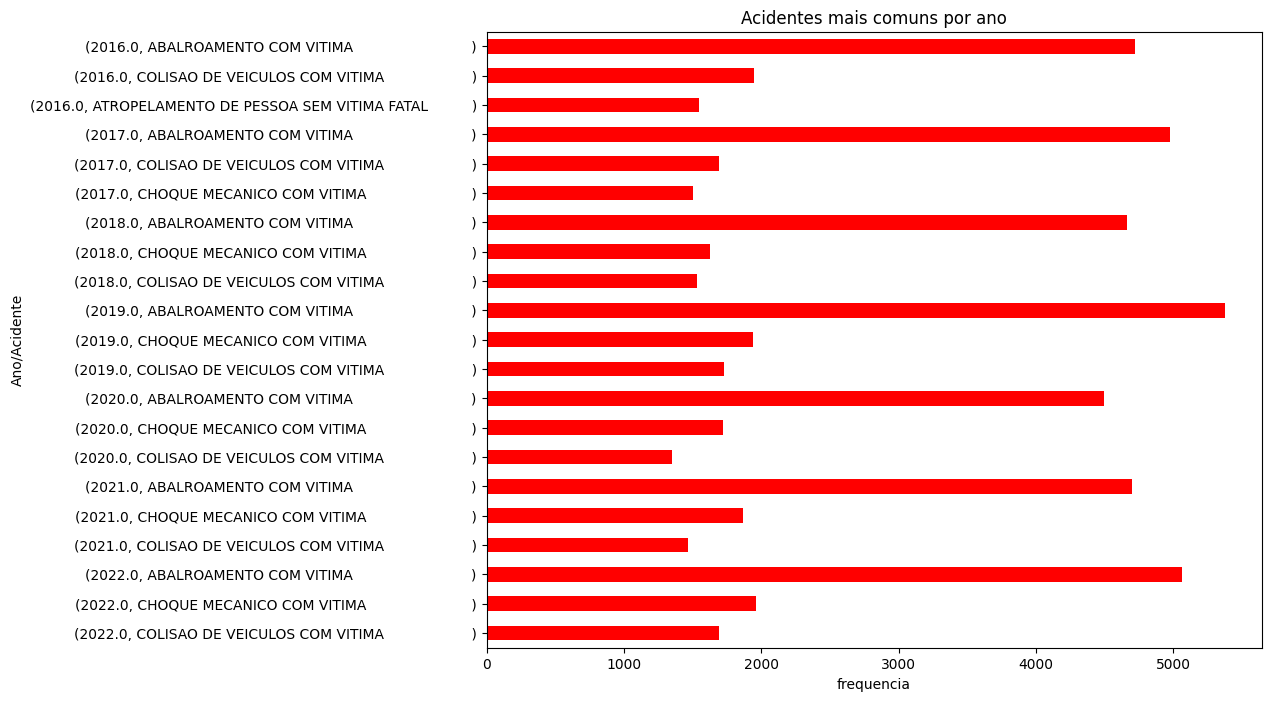

In [20]:
# Garanto que vou pegar todos os anos que temos no df
anos = df.groupby('ano').size().index

# Ordeno um novo dataframe pela frequência do acidente naquele ano
orderByType = (
    bpd.DataFrame()
    .assign(
      frequencia = (
          df
          .groupby(['ano', 'desc_tipo_acidente'])
          .size()
      )
    )
    .sort_values(by = 'frequencia',ascending=False)
    .reset_index()
  )

topPlotagem(anos, orderByType, 'ano', 'desc_tipo_acidente', 'frequencia', 'Acidentes mais comuns por ano', 'Ano/Acidente')

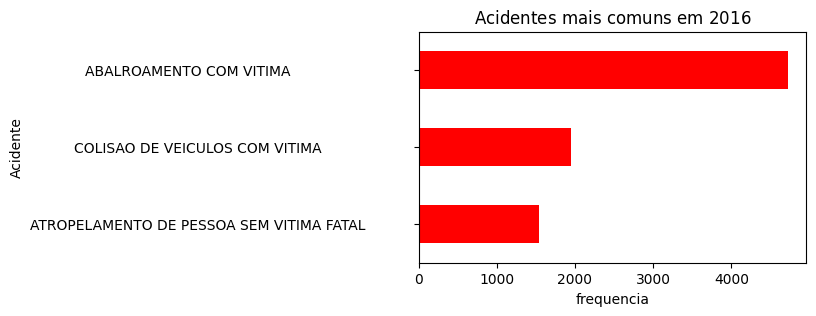

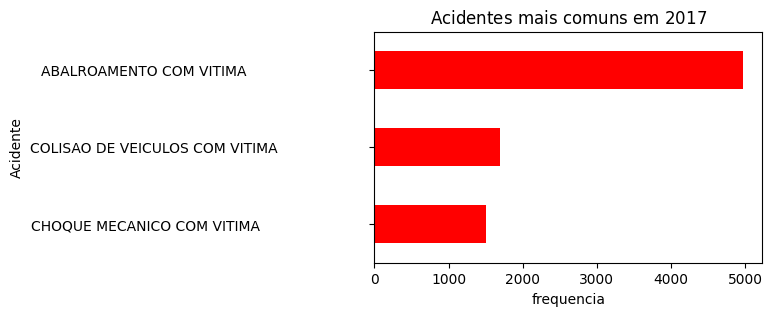

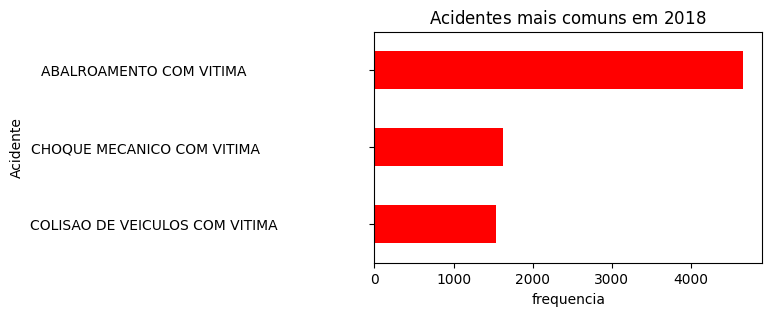

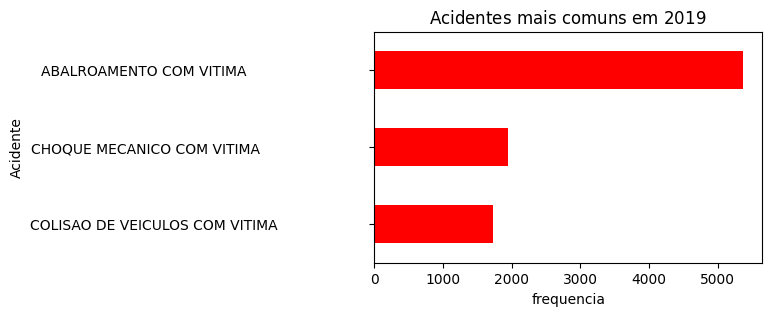

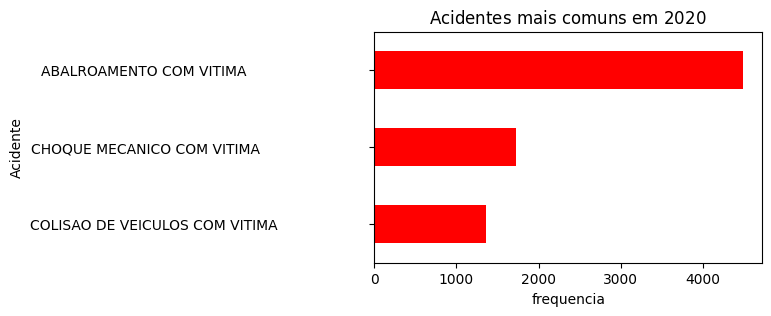

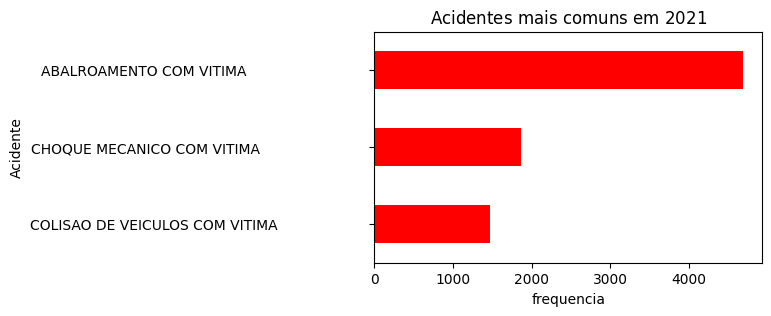

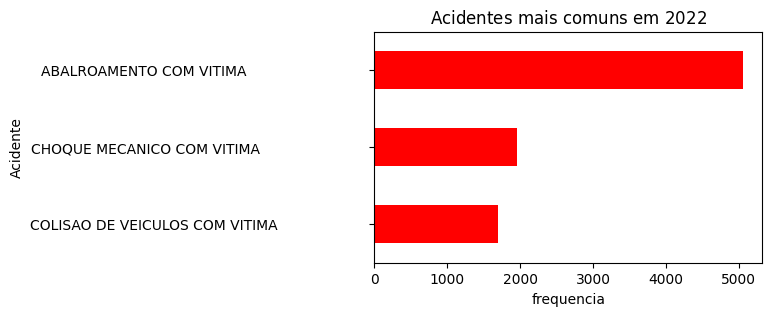

In [21]:
# Plotando um gráfico por ano
topPlotagemDetalhada(anos, orderByType, 'ano', 'desc_tipo_acidente', 'frequencia', 'Acidentes mais comuns em ', 'Acidente')

**5. Repita o gráfico acima considerando gráficos fatais e não fatais**

Agora, nosso obejtivo é considerar que alguns acidentes foram fatais e outros não. Portanto, primeiro dividiremos o nosso df, em acidentes fatais e não fatais, depois, da mesma forma realizada na questao anterior, enumeraremos os 3 acidentes mais frequentes, fatais e não fatais, por ano.

In [22]:

# primeiro vamos pegar as colunas que interessam:

df_fatalidade = (
    bpd.DataFrame()
    .assign(
      frequencia = (df.groupby(['ano', 'desc_tipo_acidente', 'indicador_fatalidade']).size()))
    .sort_values(by = 'frequencia',ascending=False)
    .reset_index()
  )

#agora vamos separar em dois df
df_fatal = df_fatalidade[df_fatalidade.get('indicador_fatalidade') == 'SIM']
df_nao_fatal = df_fatalidade[df_fatalidade.get('indicador_fatalidade') == 'NÃO']

#agora precisamos pegar os 3 mais frequentes de cada ano e montar o gráfico


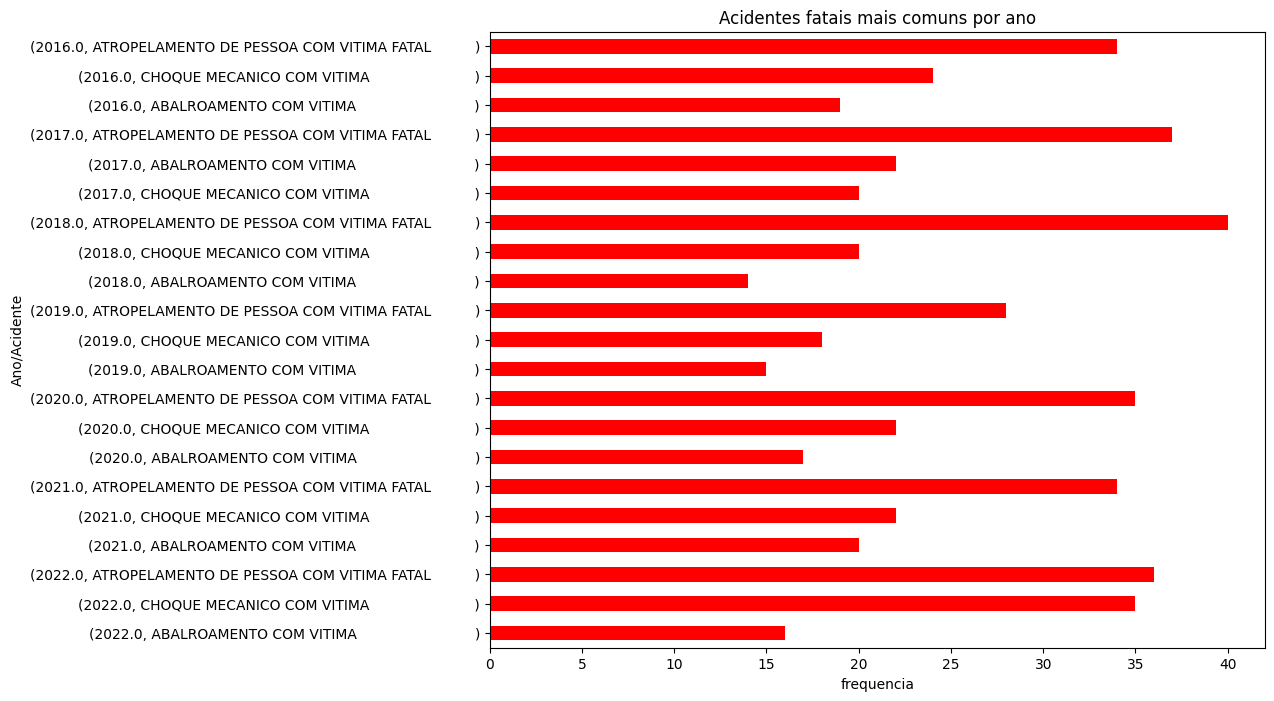

In [23]:
#primeiro, para os fatais:
topPlotagem(anos, df_fatal, 'ano', 'desc_tipo_acidente', 'frequencia', 'Acidentes fatais mais comuns por ano', 'Ano/Acidente')

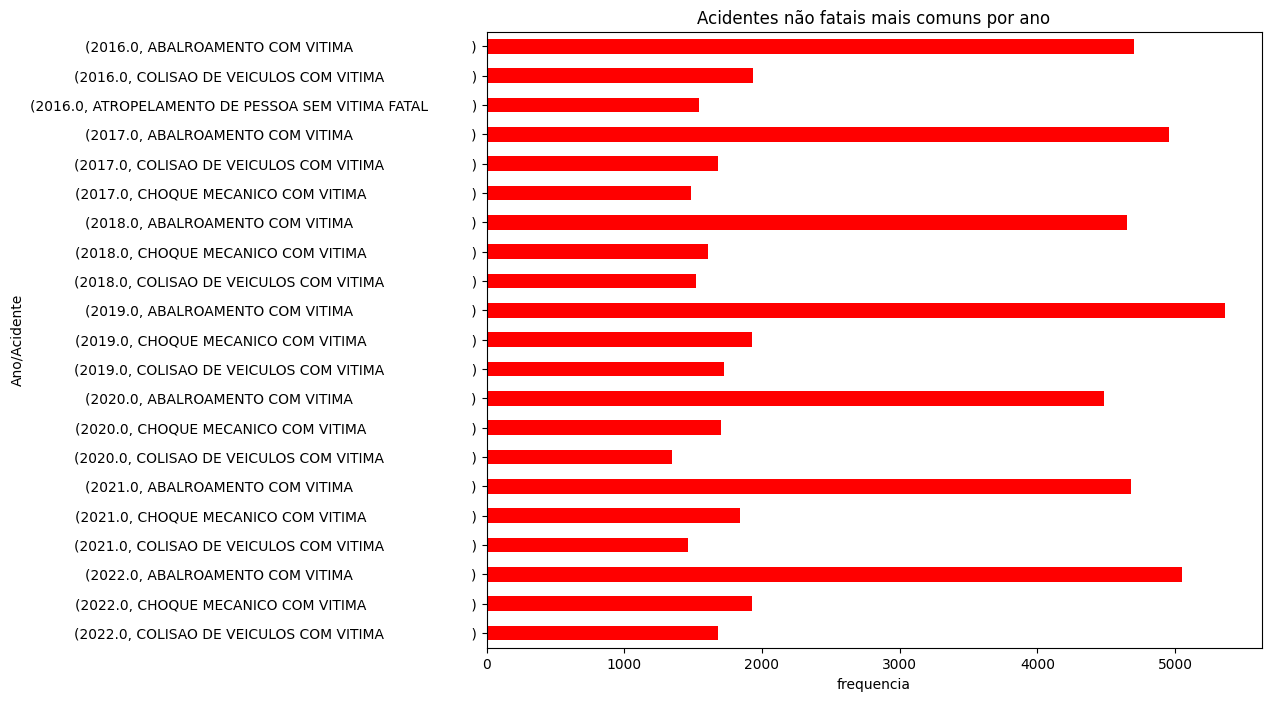

In [24]:
#agora os nao fatais:
topPlotagem(anos, df_nao_fatal, 'ano', 'desc_tipo_acidente', 'frequencia', 'Acidentes não fatais mais comuns por ano', 'Ano/Acidente')

Agora, almejando uma melhor visualização dos dados que obtemos, plotaremos um gráfico para cada ano, começando pelos acidentes fatais:

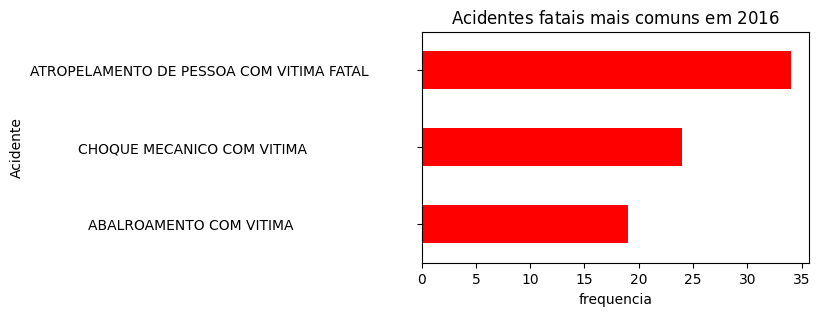

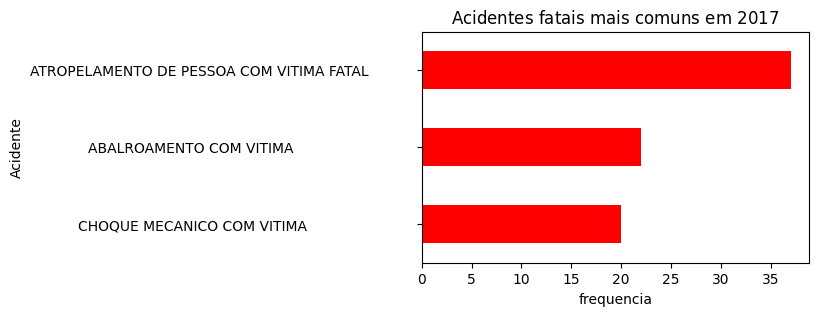

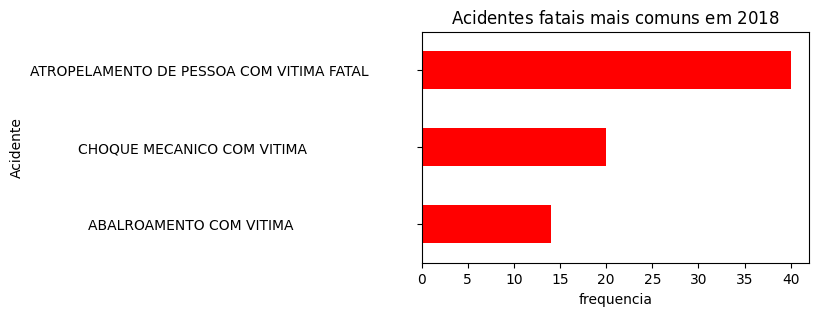

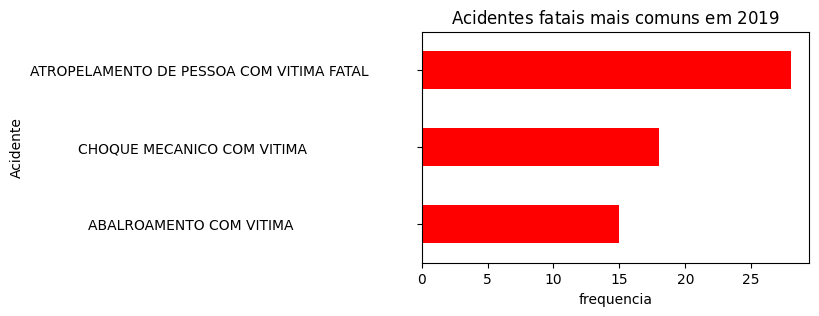

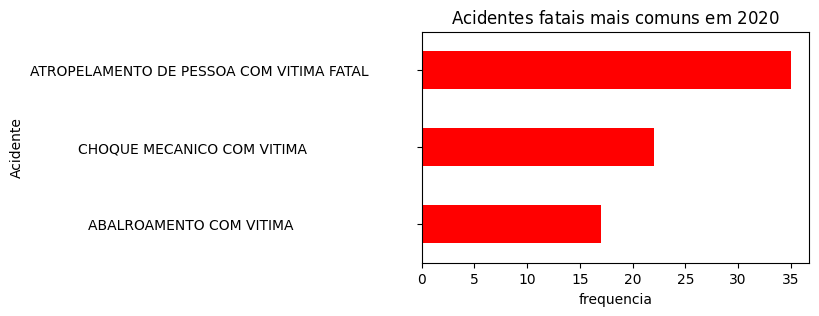

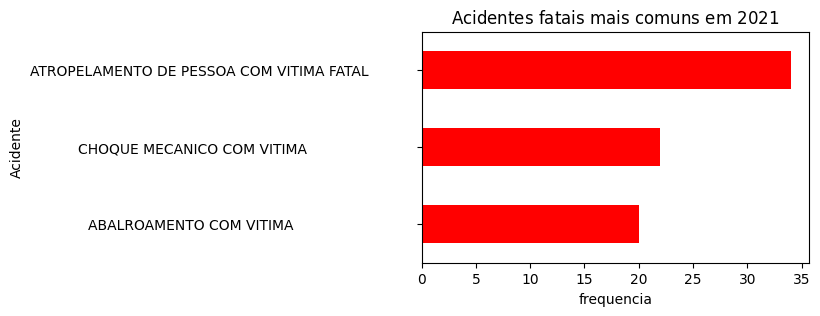

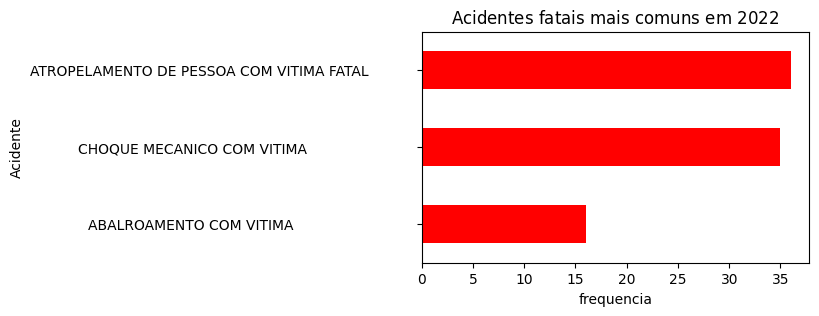

In [25]:
topPlotagemDetalhada(anos, df_fatal, 'ano', 'desc_tipo_acidente', 'frequencia', 'Acidentes fatais mais comuns em ', 'Acidente')


Agora, plotaremos os gráficos, por ano, dos acidentes não fatais:

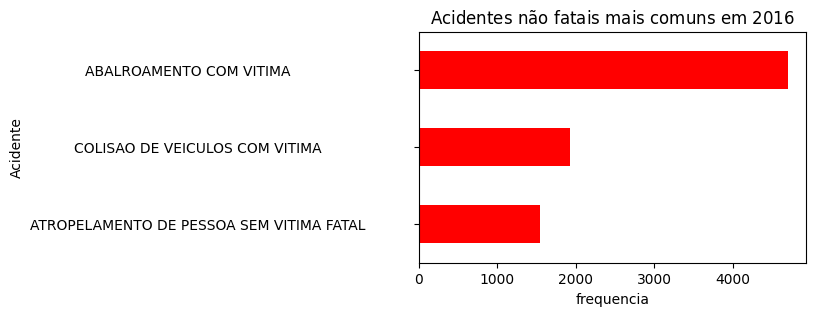

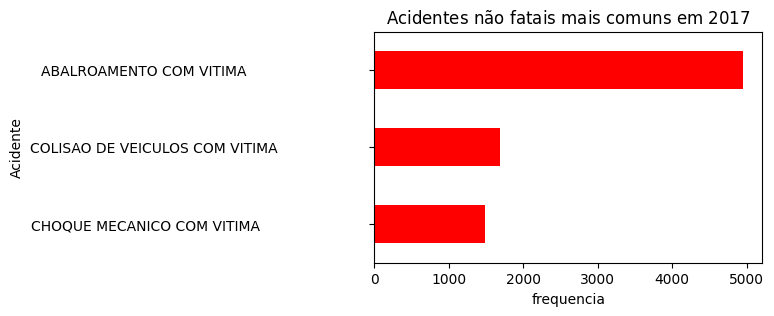

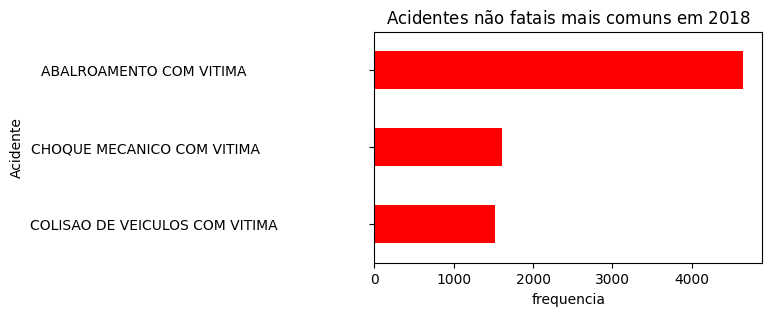

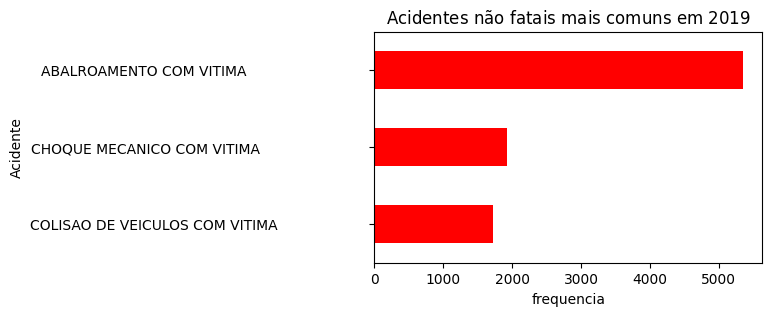

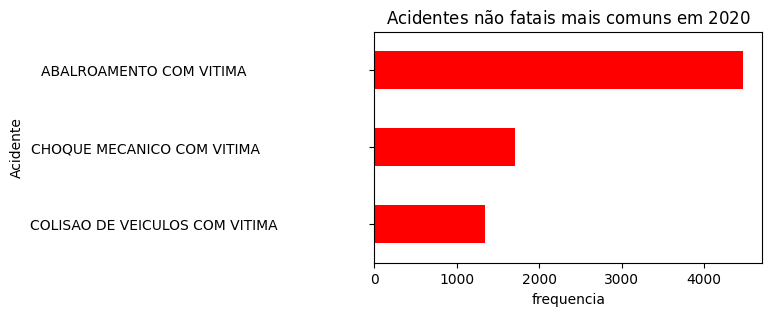

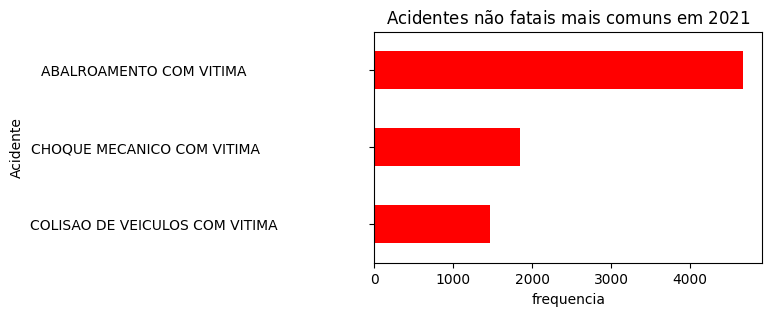

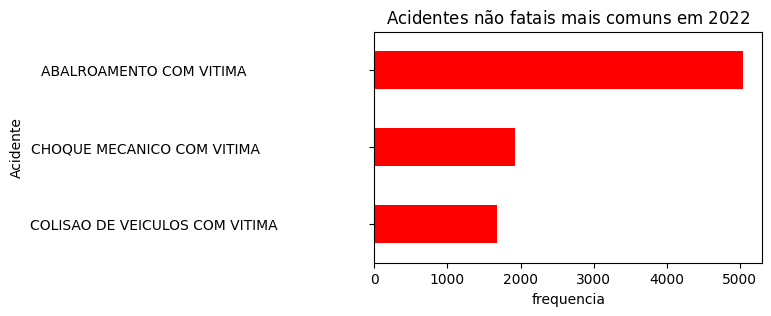

In [26]:
topPlotagemDetalhada(anos, df_nao_fatal, 'ano', 'desc_tipo_acidente', 'frequencia', 'Acidentes não fatais mais comuns em ', 'Acidente')

**6. Faça a mesma análise por bairro e por acidentes fatais e não fatais**

Agora, precisamos elaborar um gráfico de barras analisando a quantidade de acidentes fatais e não fatais por bairro da região. Nesse sentido, seguiremos o mesmo raciocínio das ultimas questões, elencando o 'top 3' bairros com mais acidentes fatais e nao fatais e cada ano que estamos analisando.

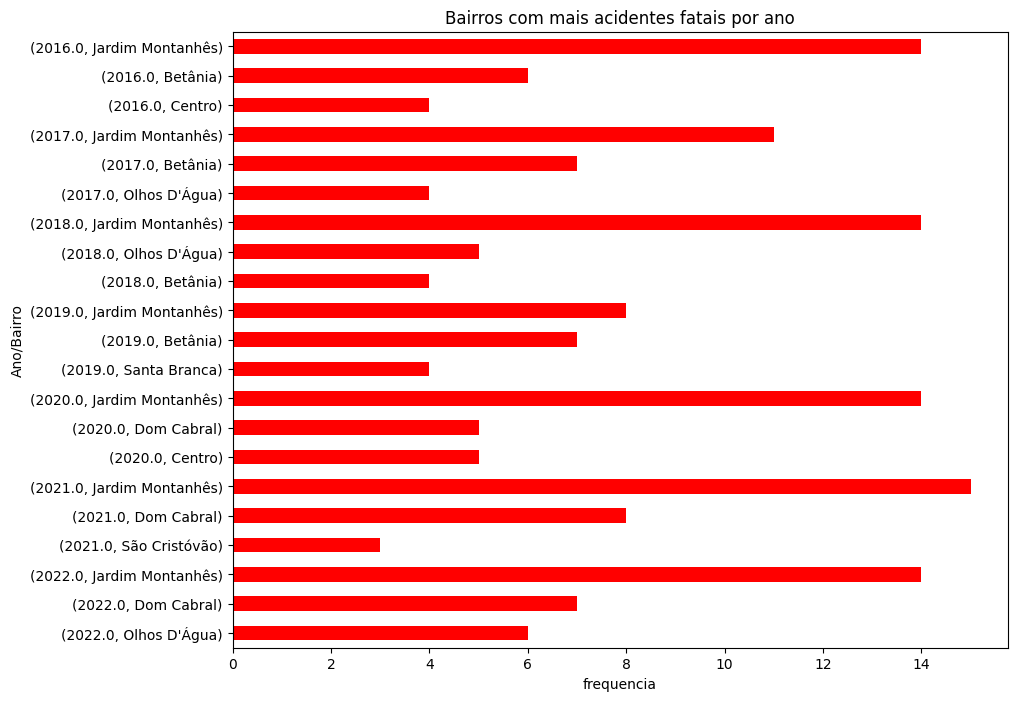

In [27]:
#vamos garantir que todos os bairros sejam pegos:
#quais os bairros com mais acidentes fatais, sem considerar a dec do acidente

bairros = df.groupby('bairro').size().index

bairros_fatalidade = (
    bpd.DataFrame()
    .assign(
      frequencia = (df.groupby(['ano', 'bairro', 'indicador_fatalidade']).size()))
    .sort_values(by = 'frequencia', ascending = False)
    .reset_index()
  )

#vamos começar pelos acidentes fatais nos bairros:

bairro_fatal = bairros_fatalidade[bairros_fatalidade.get('indicador_fatalidade') == 'SIM']
topPlotagem(anos, bairro_fatal, 'ano', 'bairro', 'frequencia', 'Bairros com mais acidentes fatais por ano', 'Ano/Bairro')

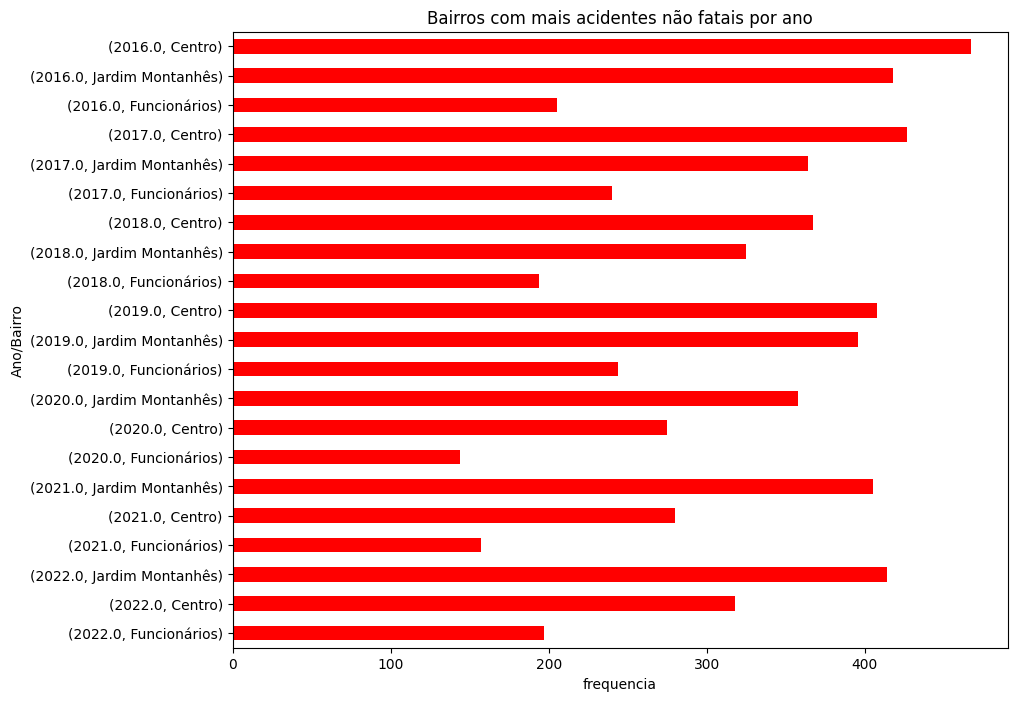

In [28]:
 #agora os nao fatais:
bairro_nao_fatal = bairros_fatalidade[bairros_fatalidade.get('indicador_fatalidade') == 'NÃO']
topPlotagem(anos, bairro_nao_fatal, 'ano', 'bairro', 'frequencia', 'Bairros com mais acidentes não fatais por ano', 'Ano/Bairro')

- Nessa questão, acabamos ficando em um empasse, uma vez que pensamos que poderíamos plotar o gráfico de cada bairro, elencando o top 3 acidentes de cada um, sem considerar os anos. Porém, ao observar o nosso DataFrame, vimos que haviam quase 300 bairros diferentes, o que impossibilitou essa possibilidade. Portanto, fizemos de uma maneira parecida com a questão anterior e, na questao 11, trouxemos novamente essa análise à tona, porém, com menos bairros e sem considerar os anos.

**7. Plotar Mapa de Belo Horizonte por Tipo de Acidente**

Comentário: Devo plotar um gráfico com latitudes e longitudes de bh, para que lembre um mapa. Então, separo o df por tipo de acidente e crio um para cada tipo, mostrando onde foram as ocorrências.

In [29]:
def plotMap(df, acident):
  formatted = acident.title().split()
  oficial = ''
  for word in formatted:
    oficial += word + ' '

  (
    df.plot(
      kind='hexbin',
      x='lat',
      y='lon',
      mincnt=1,
      gridsize=75,
      figsize = (9,6),
      bins='log',
      title = oficial + 'em Belo Horizonte entre 2016 e 2022'
    )
  )

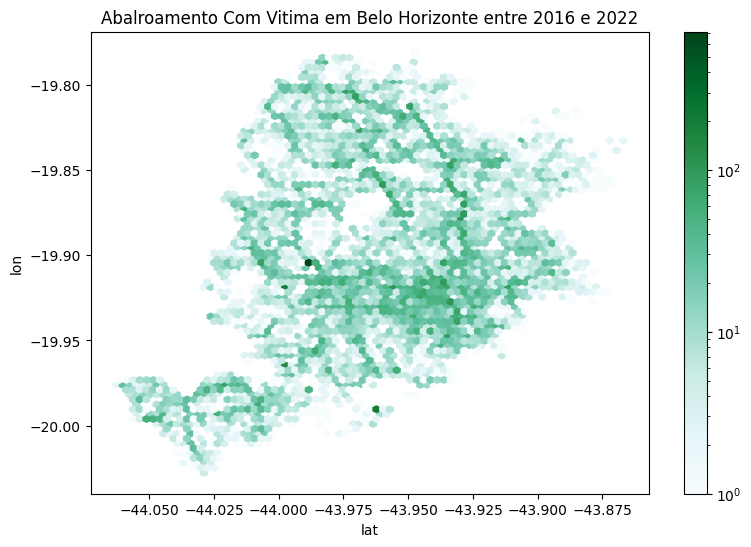

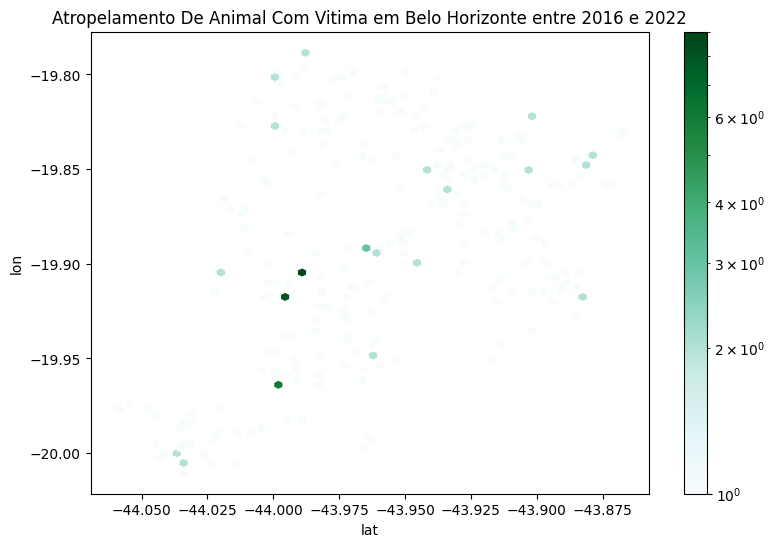

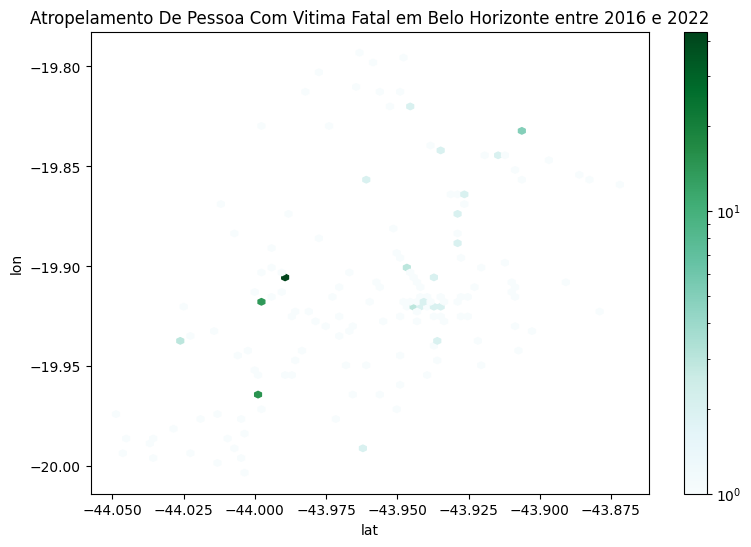

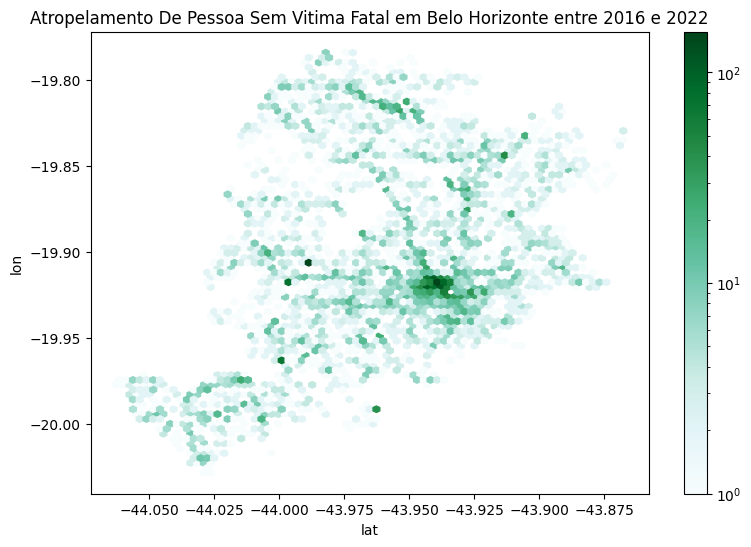

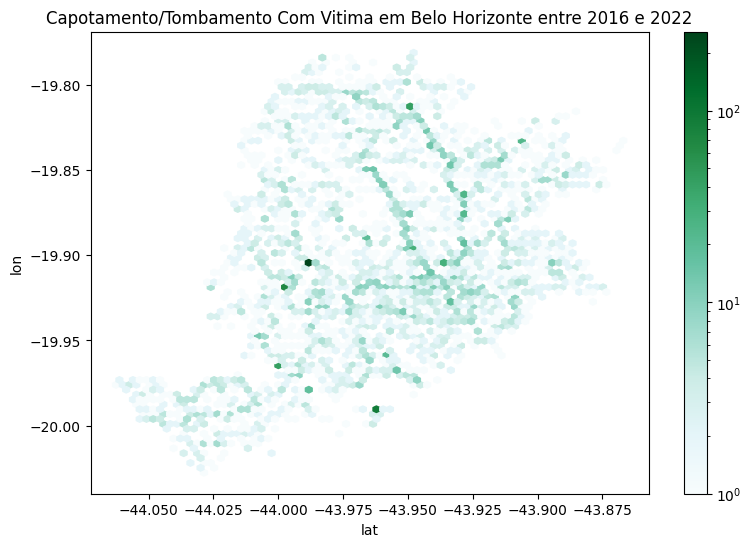

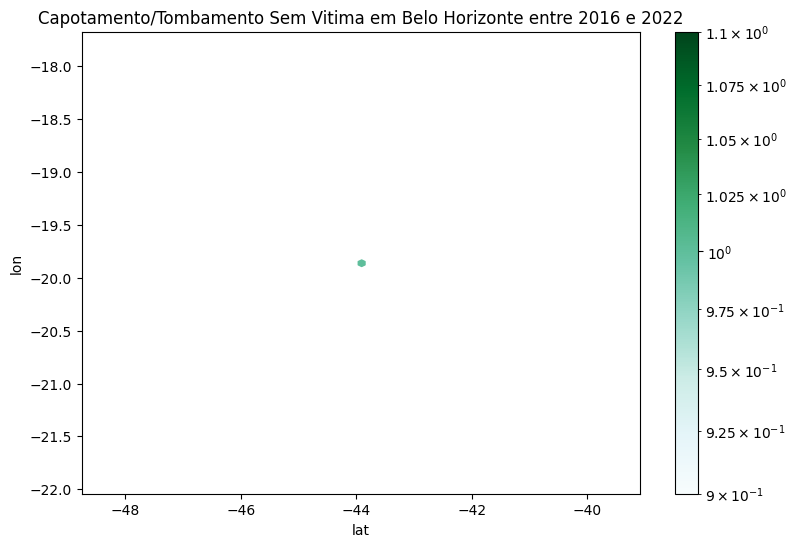

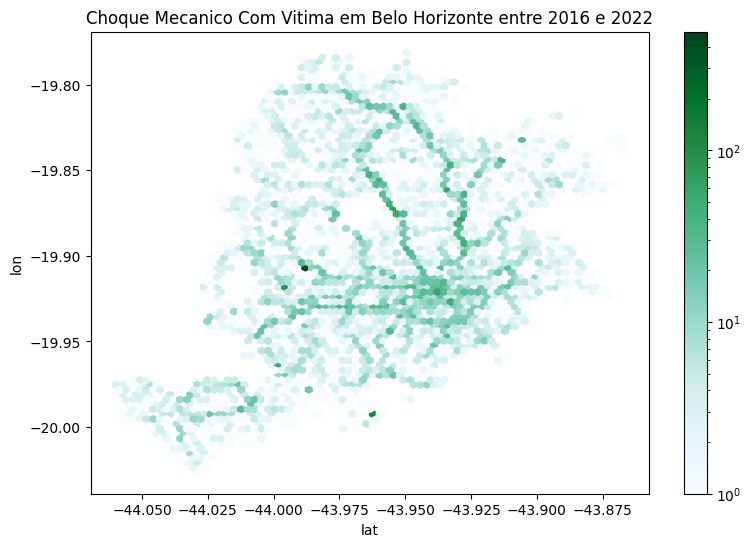

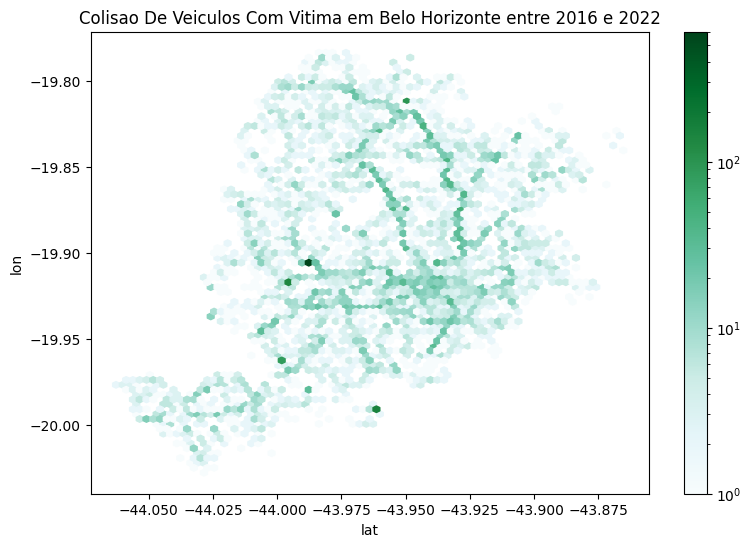

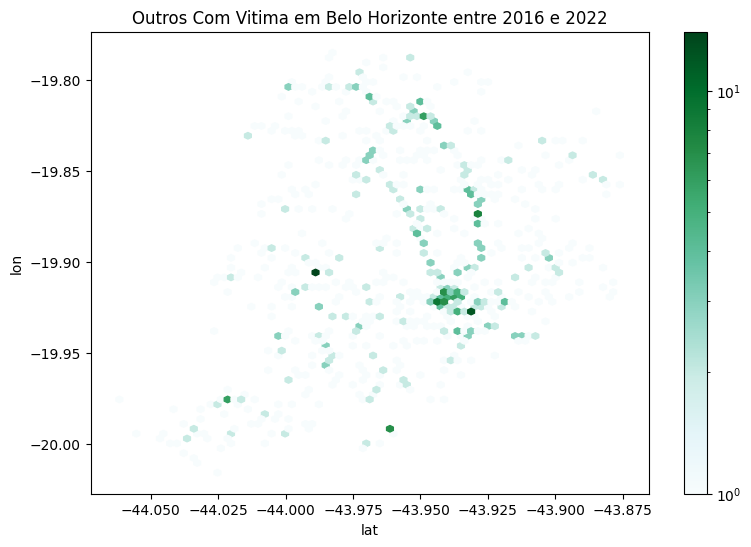

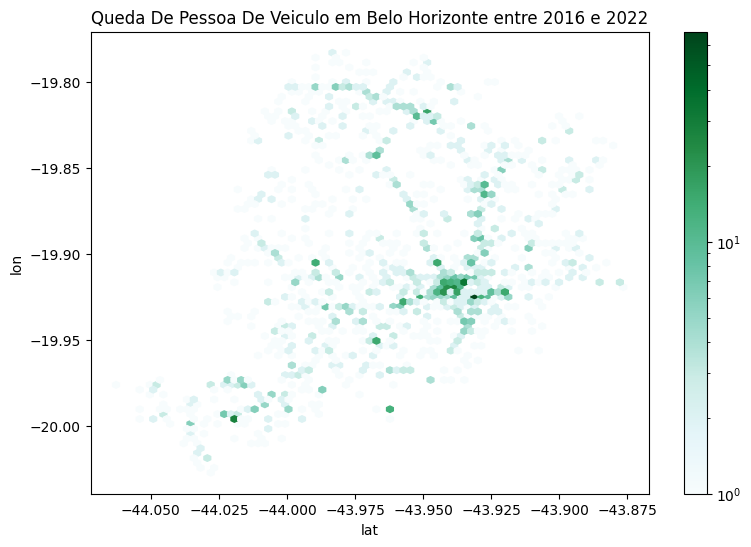

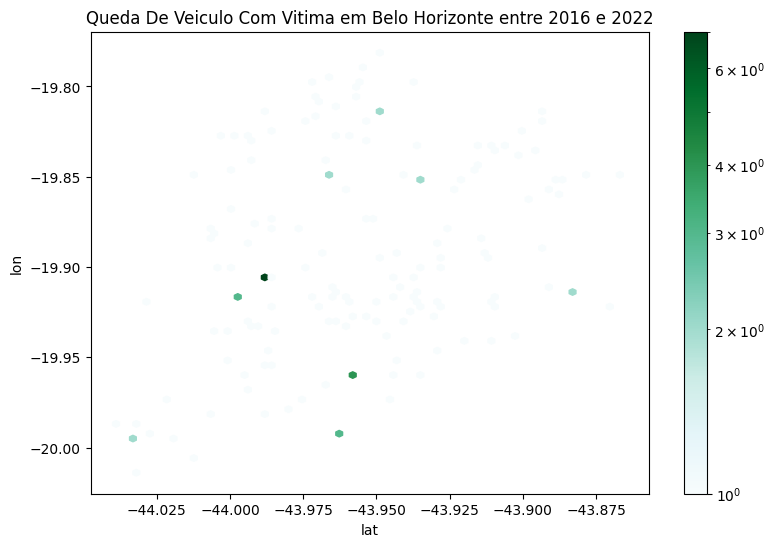

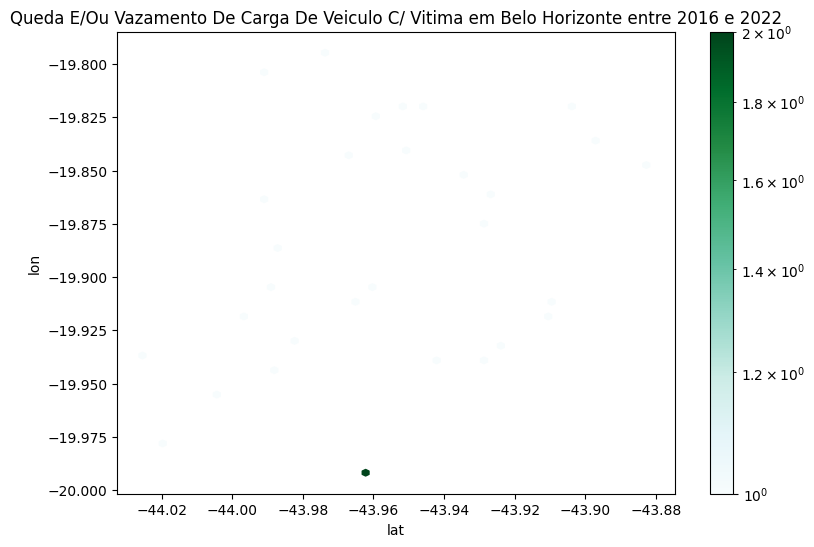

In [30]:
# Recolho os diferentes tipos de acidentes, para fazer a quantidade correta de mapas
typeList = df.groupby('desc_tipo_acidente').size().index

# Para cada tipo de acidente, ploto um mapa (gráfico)
for type in typeList:
  especific = df[df.get('desc_tipo_acidente') == type]
  plotMap(especific, type)

**8. Plotar Intervalo de Confiança via Bootstrap do Número de Acidentes por Mês**

Agora fazemos uma analise com base em uma amostra, a qual será os números da nossa propria tabela, separados por mes. A ideia é fazer a reamostragem dessa amostra um número grande de vezes e, após isso, calcular o intervalo de confiança.  

In [31]:
# Código importante daqui pra frente

# Definindo semente aleatória para garantir resultados
np.random.seed(42)

Assim, resolvemos adotar duas estratégias


Primeiramente, vamos considerar como população os 7 anos que temos: vamos pegar uma pequena amostra de toda a população (de forma aleatória) e tentar identificar a quantidade de acidentes daquele mês (a média de acidentes que ocorre naquele mês), em 7 anos, entendendo o quão boa é a nossa amostra.

Vamos imaginar que temos apenas uma amostra com 4 anos e queremos saber a quantidade de acidentes em um determinado mês. Qual essa quantidade? O quão boa nossa amostra é?

In [32]:
np.random.seed(42)

anos = df.groupby('ano').size().index
repetitions = 500

def mediaMensal(mes):
  ''' Calculo a média de acidentes que ocorreram em um determinado mês.'''

  return (df[df.get('mes')==mes].shape[0] / len(anos))

def bootstrap(mes, dfBootstrap, anosSelecionados, ponto):
  '''Realiza o bootstrap para descobrir qual a quantidade média de acidentes que ocorrem em determinado mês'''
  tam = dfBootstrap.shape[0]
  quantBootstrap = np.array([])
  for i in range(repetitions):
    amostra = dfBootstrap.sample(tam, replace=True)
    # Calculo a quantidade total de acidentes e divido pela quantidade de anos que tenho (média do mês)
    quantidade = amostra[amostra.get('mes') == mes].shape[0]/len(anosSelecionados)
    quantBootstrap = np.append(quantBootstrap, quantidade)

  # Calculando os intervalos de confiança (para 95%)
  left = np.percentile(quantBootstrap, 2.5)
  right = np.percentile(quantBootstrap, 97.5)

  # Começo o plot, adicionando as médias em um novo df e plotando esse df como histograma
  (
      bpd.DataFrame()
      .assign(quantidadesBootstrap = quantBootstrap)
      .plot(
          title = f'Quantidade média de acidentes no mês ${mes}$',
          kind='hist',
          density=True,
          ec='w',
          figsize=(7, 5)
        )
  )

  # Adiciono o intervalo de confiança
  plt.plot(
      [left, right],
      [0, 0],
      color='gold',
      linewidth=12,
      label='Intervalo de 95% de confiança',
      zorder=2
  )

  # Mostrando a média do mês
  # Adiciono um ponto indicando a média populacional
  plt.scatter(
    ponto,
    0.001,
    color='red',
    s=100, # tamanho
    label='Média Populacional'
  ).set_zorder(2) # ordem de sobreposição

  plt.legend()
  plt.ylabel("Frequência")

  plt.show()

Nossa amostra abrange os acidentes dos anos de: [2016 2017 2021 2018]


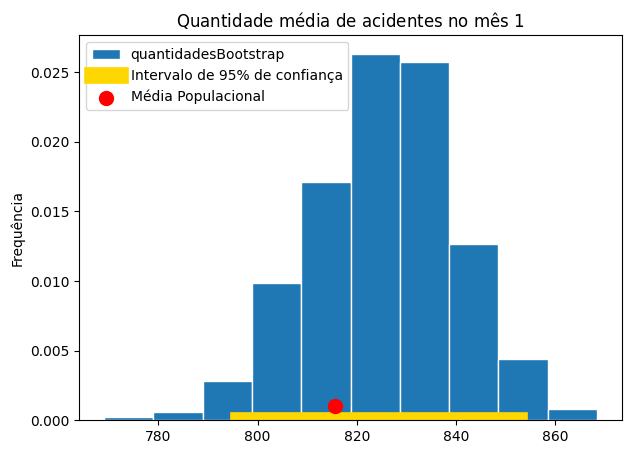

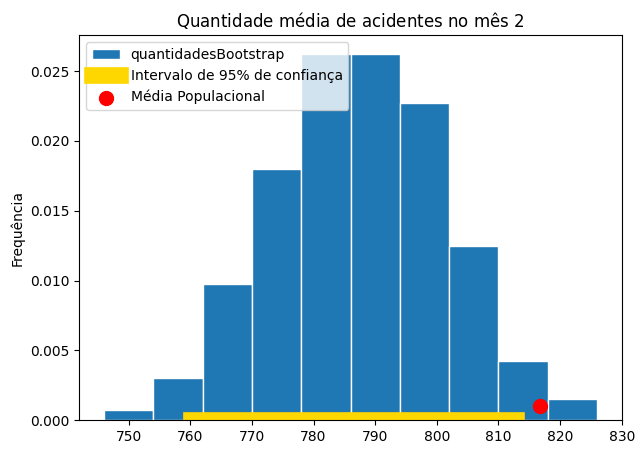

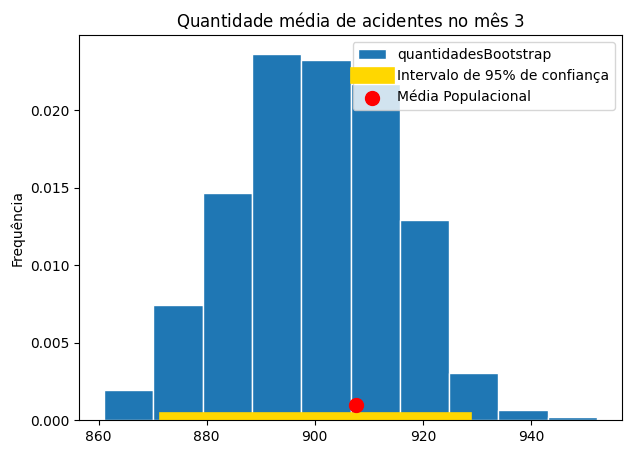

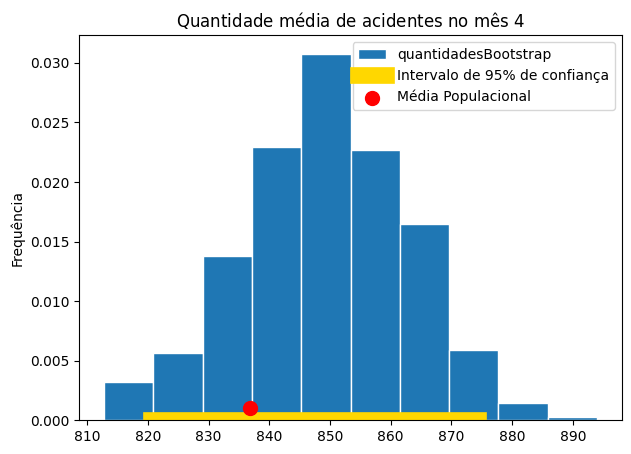

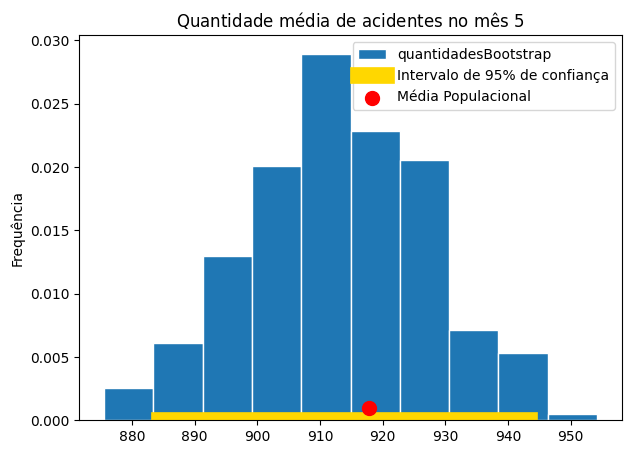

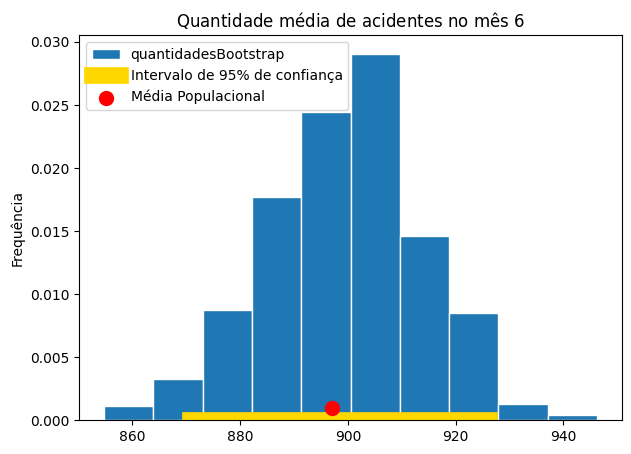

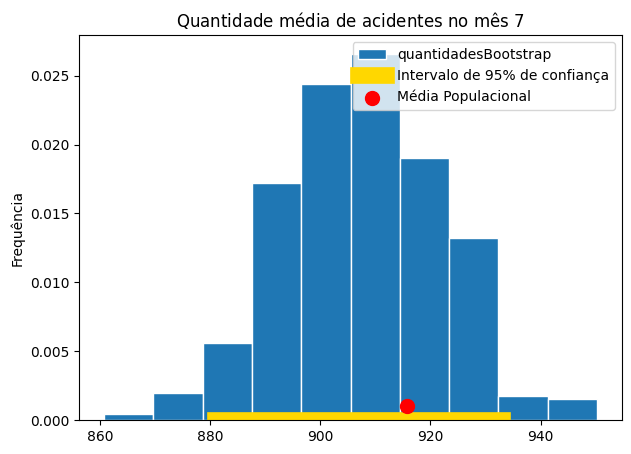

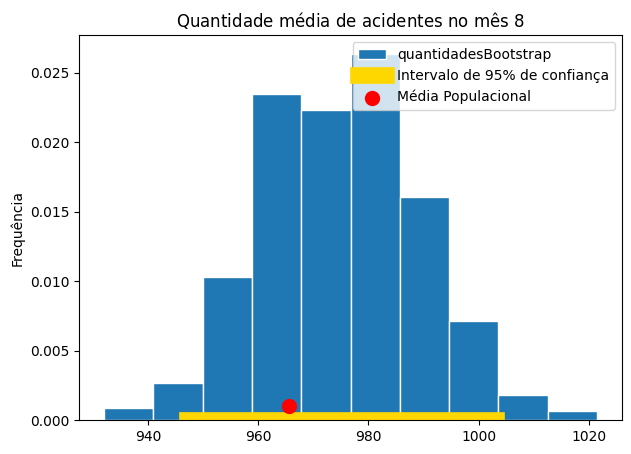

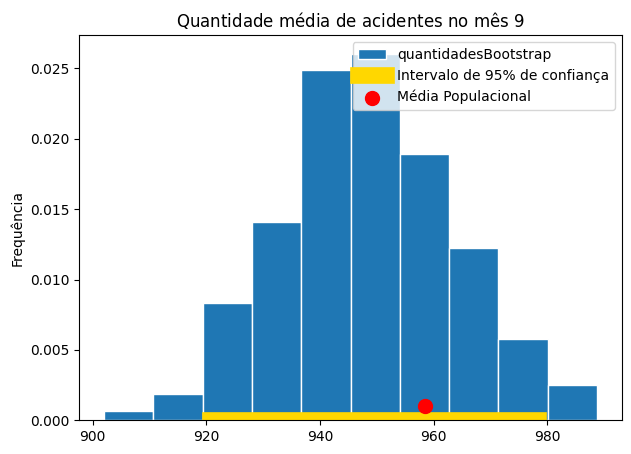

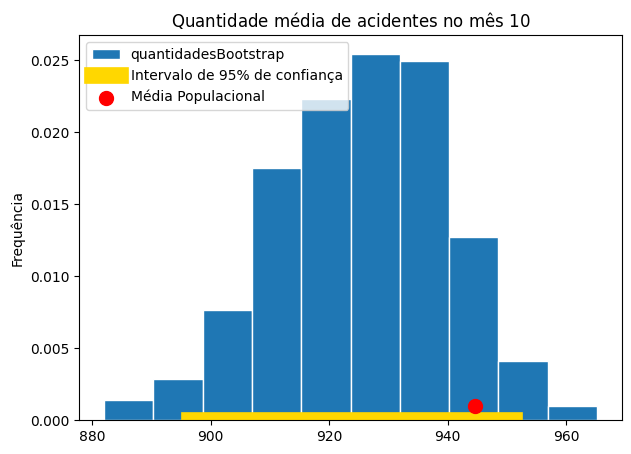

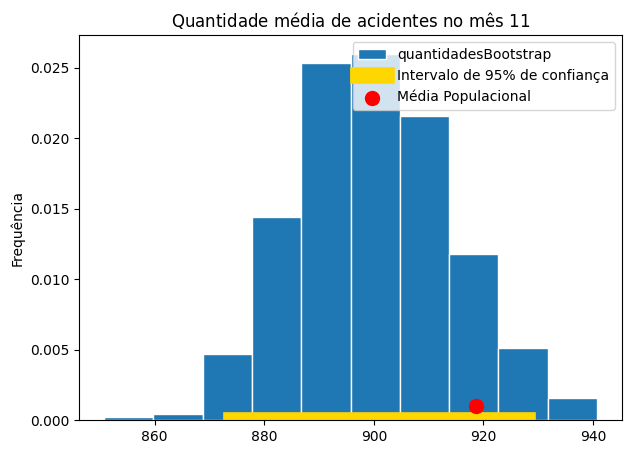

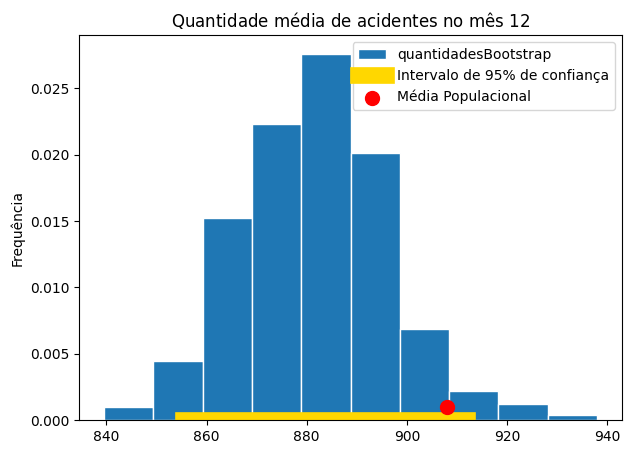

In [33]:
np.random.seed(42)

# Primeiro, selecionamos os anos que temos, ao acaso
anosSelecionados = np.array(np.random.choice(anos, 4, replace=False))

dfBootstrap = df[(df.get('ano') == anosSelecionados[0]) |
                 (df.get('ano') == anosSelecionados[1]) |
                 (df.get('ano') == anosSelecionados[2]) |
                 (df.get('ano') == anosSelecionados[3])]

print(f'Nossa amostra abrange os acidentes dos anos de: {anosSelecionados}')

# Agora vamos realizar o bootstrap para cada mês
for i in range(1, 13):
  # Média do mês
  medMes = mediaMensal(i)
  bootstrap(i, dfBootstrap, anosSelecionados, medMes)

Percebemos que, devido ao número de repetições, nossa amostra é boa para a maioria dos meses. Porém, como estamos trabalhando como uma variável muito sensível a outliers, ou seja, que se mudamos a quantidade de acidentes naquele mês em um ano, como não mudamos nosso N, a média é afetada pois o total diminui/aumenta (total/N) somos afetados em alguns meses, no nosso caso, em que temos os anos de 2016, 2017, 2018 e 2021 - semente 42 - apenas o mês de Fevereiro. No geral, entretanto, o processo do Bootstrap funcionou.

Agora, vamos considerar que a população engloba todos os anos da história de Belo Horizonte e queremos realizar o mesmo processo acima, porém com os 7 anos que temos (que agora será nossa amostra). Diferente do processo anterior, não teremos certeza do quão boa nossa amostra é, pois não temos a média real de cada mês. Portanto, vamos contabilizar a média mensal geral (como se contássemos todos os acidentes de 1 ano e dividíssimos por 12) e levaremos isso como parâmetro.  

Nossa amostra abrange os acidentes dos anos de: [2016 2017 2018 2019 2020 2021 2022]


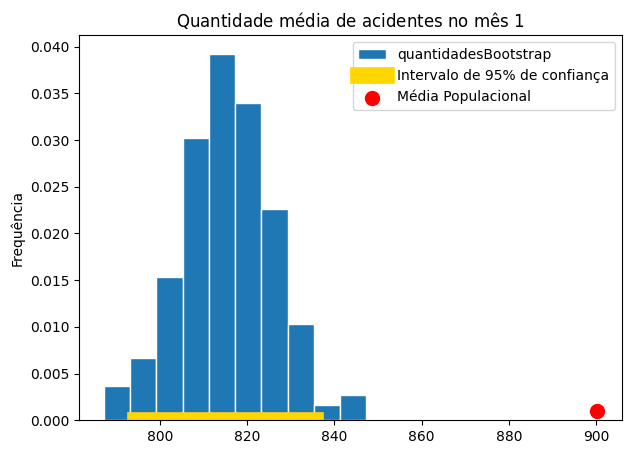

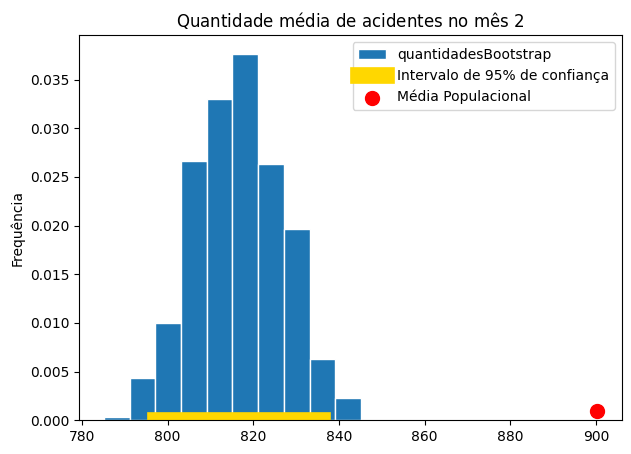

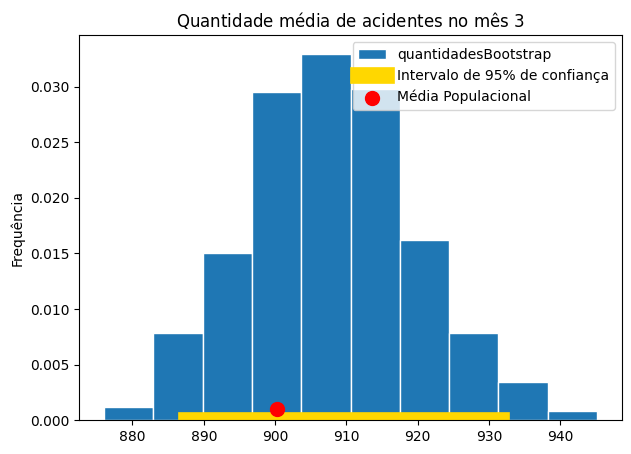

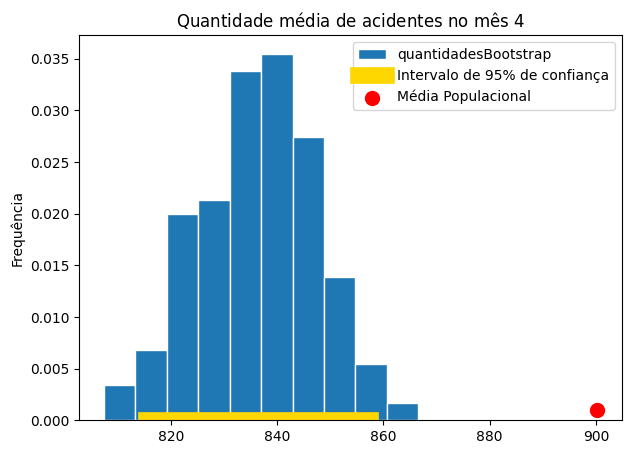

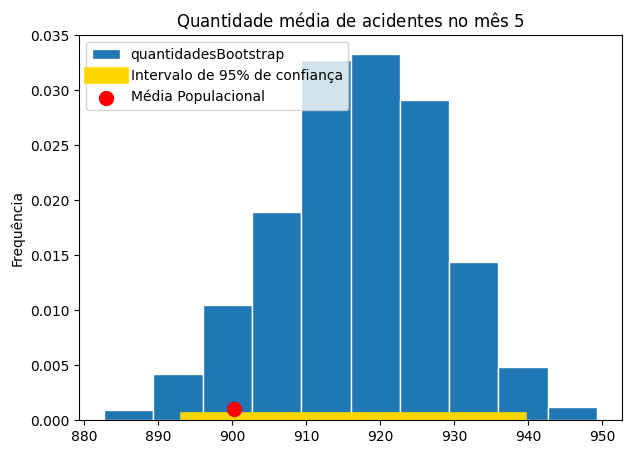

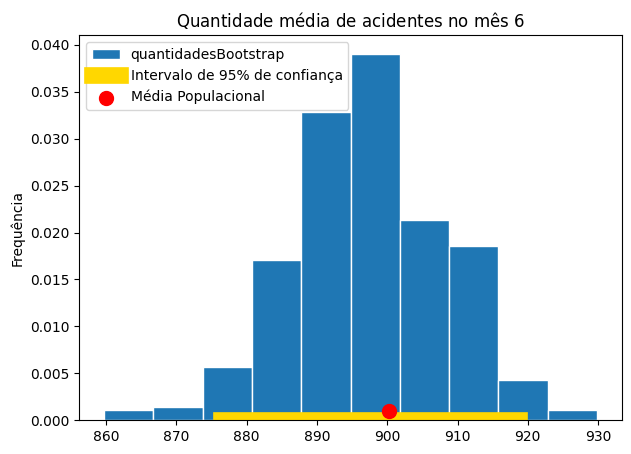

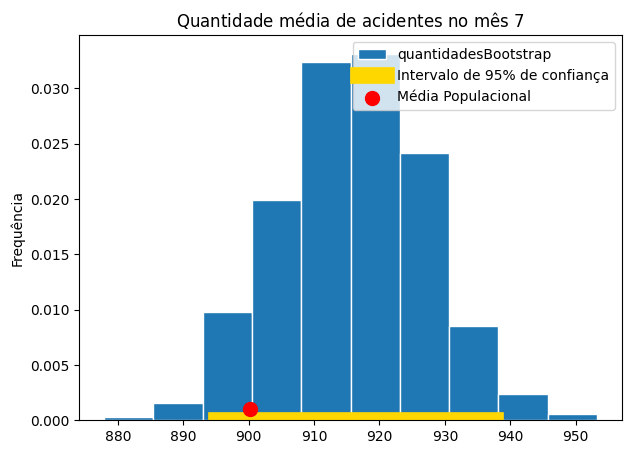

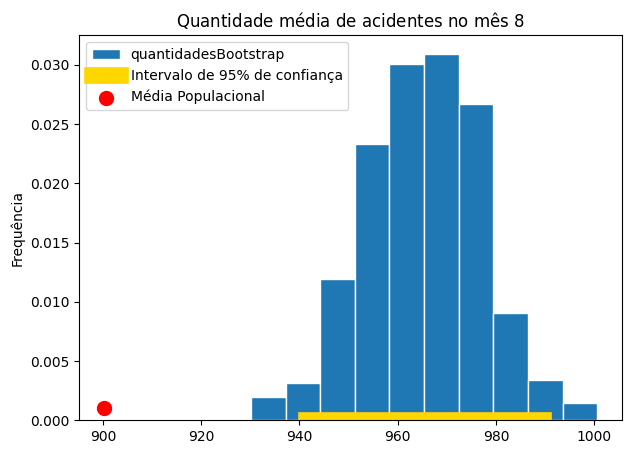

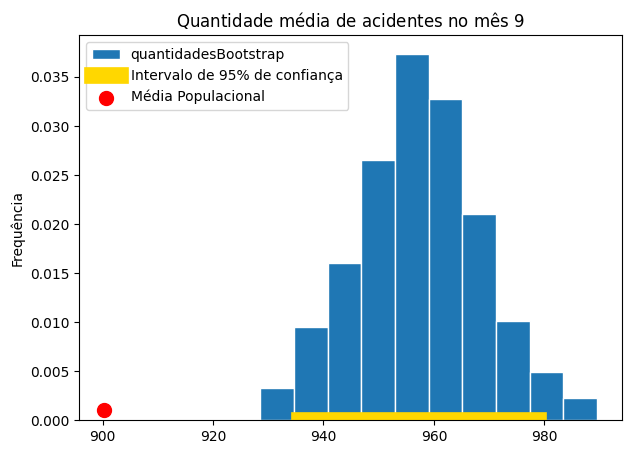

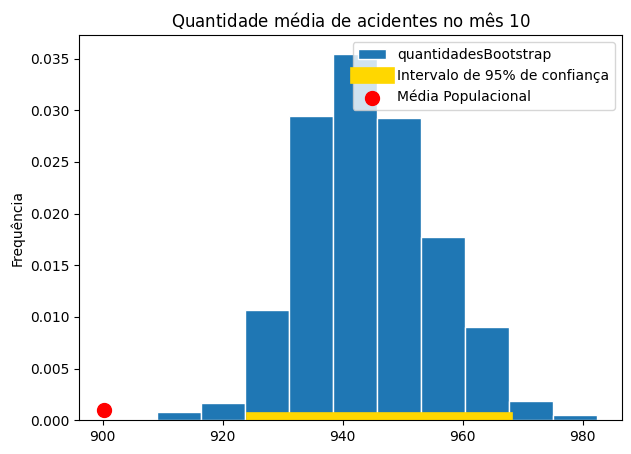

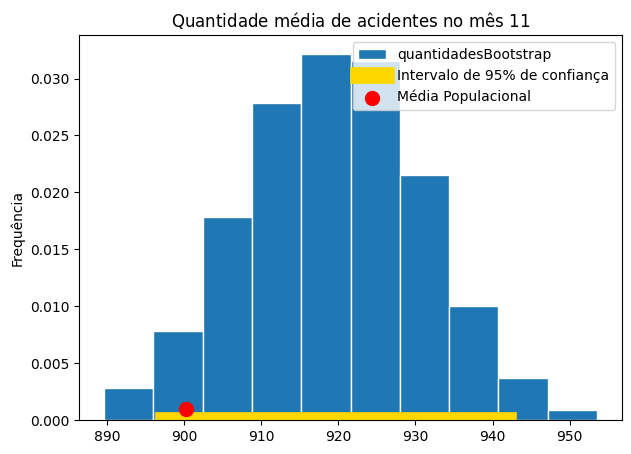

In [34]:
np.random.seed(42)

# Usaremos a variável com todos os anos
print(f'Nossa amostra abrange os acidentes dos anos de: {np.array(anos)}')

# Vamos calcular a média de acidentes mensal, sem especificar o mês
sumAcident = df.shape[0]    #quantos acidentes temos no total
quantMes = len(anos)*12     #quantos meses temos no total
mediaReal = sumAcident/quantMes
# Isso vai nos permitir ter uma noção da amostra, mas não a certeza do quão boa ela é

# Agora vamos realizar o bootstrap para cada mês
for i in range(1, 13):
  bootstrap(i, df, np.array(anos), mediaReal)

O que entendemos aqui é, na verdade, o quão próximo da média mensal (com base em 6 anos), a quantidade de acidentes em cada um dos meses está. Assim, não temos certeza se nosso bootstrap foi bom em relação a população que estamos considerando. Porém, conseguimos ter uma noção de quantos acidentes temos em toda ocorrência daquele mês. Ou seja, em janeiro de 2023, com 95% de certeza, a quantidade de acidentes ficou entre 790 e 840.

**9. Faça gráficos de dispersão onde o eixo X é o número de acidentes em 2019, 2020 ou 2021**

Comentário: Devo fazer um gráfico de dispersão, em relação aos bairros de bh, para cada um dos anos citados. Ou seja, devo agrupar a tabela por bairro e ano, pegar de cada um dos anos desejados, e plotar, comparando com 2022 (o dado mais recente).

In [35]:
# Separo todos os dados por ano

cont_anterior = df.groupby(['bairro', 'ano']).size().reset_index()

# usei o pandas para criar um novo dataFrame com os valores de cont mas com as colunas renomeadas
# fiz isso porque não estava conseguindo chamar a coluna '0', para saber o size de cada bairro
cont = pd.DataFrame(cont_anterior.values, columns=['bairro', 'ano', '0'])


dados_2019 = cont[cont.get('ano') == 2019]
dados_2020 = cont[cont.get('ano') == 2020]
dados_2021 = cont[cont.get('ano') == 2021]
dados_2022 = cont[cont.get('ano') == 2022]

In [36]:
def juntar(df1, df2, comunColumn):
  "Função para unir 2 dataframes com uma coluna em comum"
  merged = (
    df1
    .merge(
      df2,
      on=comunColumn
    )
  )
  return merged

def plotarScatter(merged, ano1, ano2, parametro):
  "Função para plotar um gráfico de dispersão em relação a dois anos"
  (
    merged
      .plot(
          kind='scatter',
          x='0_x',
          y='0_y',
          xlabel = f'${ano1}$',
          ylabel = f'${ano2}$',
          title = f'Acidentes por ${parametro}$: ${ano1}$ vs. ${ano2}$',
          figsize = (10,7),

      )


  )


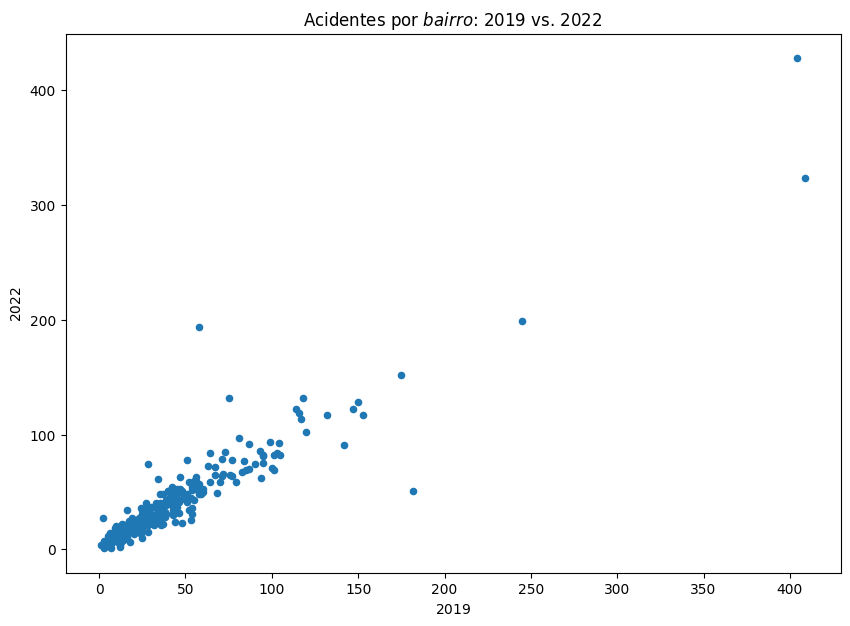

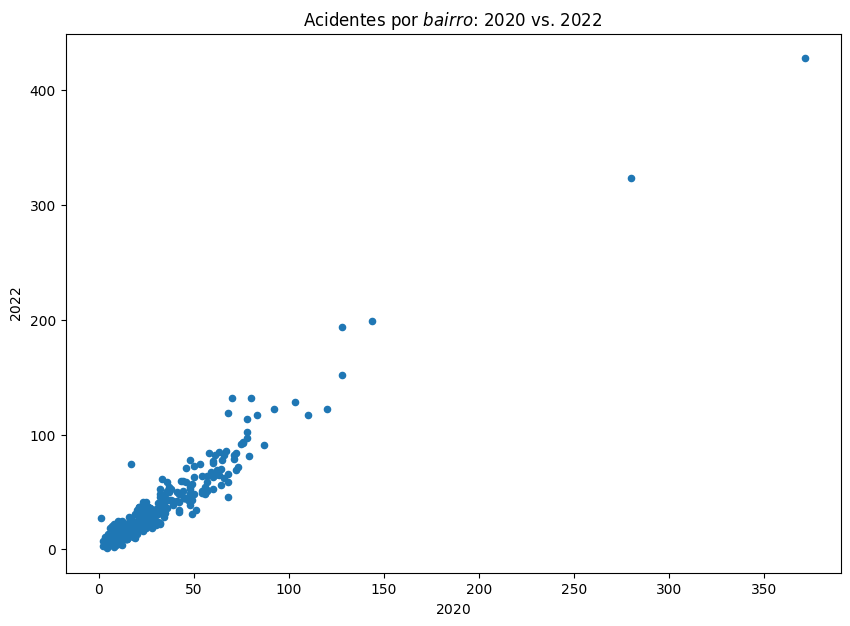

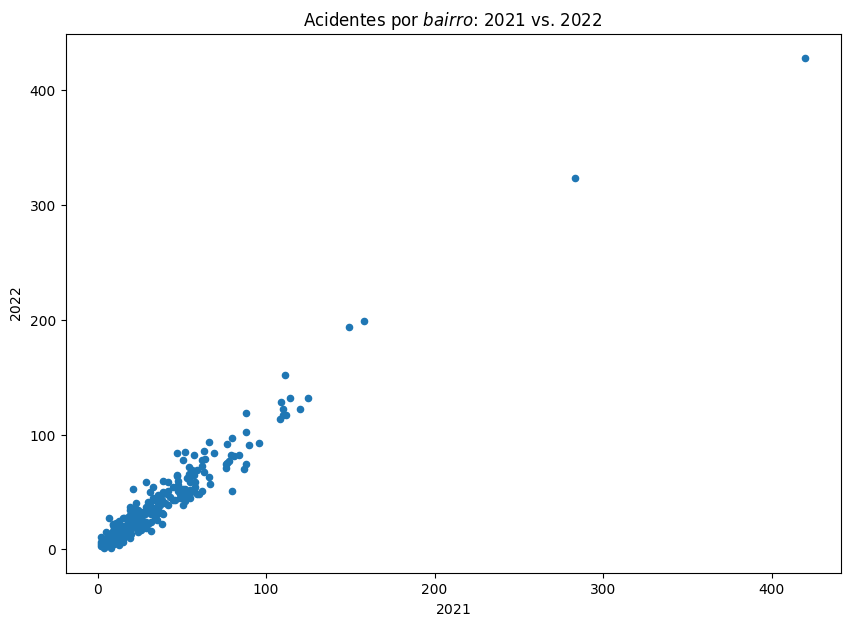

In [37]:
# Defino listas para os nomes dos dfs e para os anos
dataFrames = [dados_2019, dados_2020, dados_2021]
especificYears = [2019, 2020, 2021]
lastYear = 2022

# Crio um for para que sejam impressos os gráficos para cada um dos anos desejados
for dataFrame, year in zip(dataFrames, especificYears):
    merged_ano = juntar(dataFrame, dados_2022, 'bairro')
    plotarScatter(merged_ano, year, lastYear, 'bairro')



A partir de uma análise dos gráficos gerados, percebemos que existiam pontos outliers. Pensando nisso, resolvemos tratar esses bairros, retirando-os do df.

Torna-se perceptível pelo gráfico que a grande maioria dos bairros têm menos de
100 acidentes por ano, com alguns tendo entre 100 e 200. Portanto, resolvemos identificar
quais são os bairros com mais ou exatamente 200 acidentes.

In [38]:
# Outliers de cada ano
outliers_2019 = np.array(dados_2019[dados_2019.get('0') >= 200].get('bairro'))
outliers_2020 = np.array(dados_2020[dados_2020.get('0') >= 200].get('bairro'))
outliers_2021 = np.array(dados_2021[dados_2021.get('0') >= 200].get('bairro'))
outliers_2022 = np.array(dados_2022[dados_2022.get('0') >= 200].get('bairro'))

# Todos os bairros do df
bairros = np.array(cont.groupby('bairro').sum().index)

In [39]:
listOutliers = np.array([])

# Vamos identificar quais bairros são outliers "constantes", ou seja, em todos os anos
for bairro in bairros:
  if (bairro in outliers_2019 and
      bairro in outliers_2020 and
      bairro in outliers_2021 and
      bairro in outliers_2022):
    listOutliers = np.append(bairro, listOutliers)

listOutliers

array(['Jardim Montanhês', 'Centro'], dtype='<U32')

Ou seja, os dados dos bairros Jardim Montanhês e Centro, são outliers frequentes em todas as nossas amostras, portanto, vamos retirá-los, buscando melhoras nossas estimativas, como fomos instruídas em nossas aulas.

Por pesquisa externa, percebemos que os bairros com mais acidentes (Jardim Montanhês e Centro)
não são os bairros mais populosos de BH, o que despertou a curiosidade de porque esses são os bairros
com mais ocorrências (discutiremos na 11). De qualquer forma, queremos fazer uma análise sem outliers,
portanto vamos tirar essas linhas do dataframe antes de criar os gráficos de dispersão.

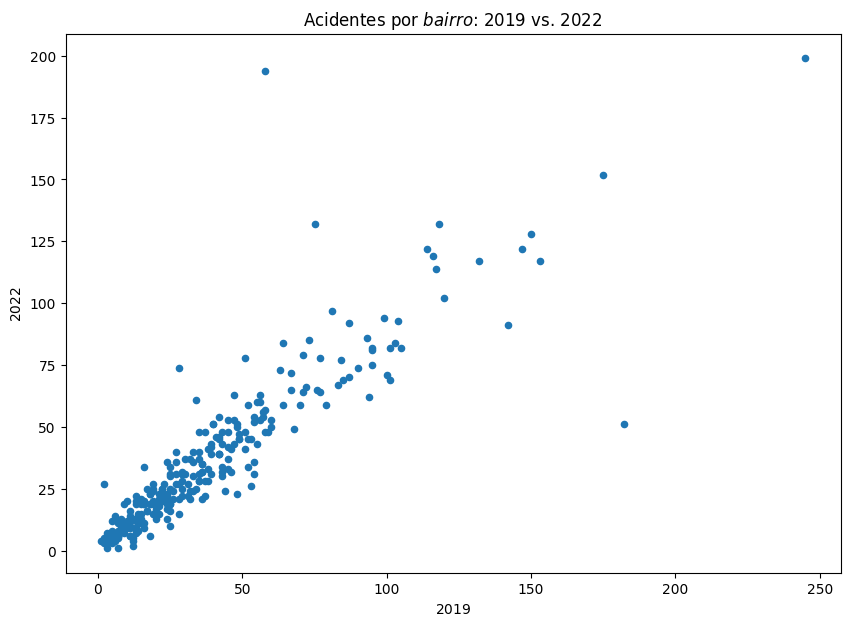

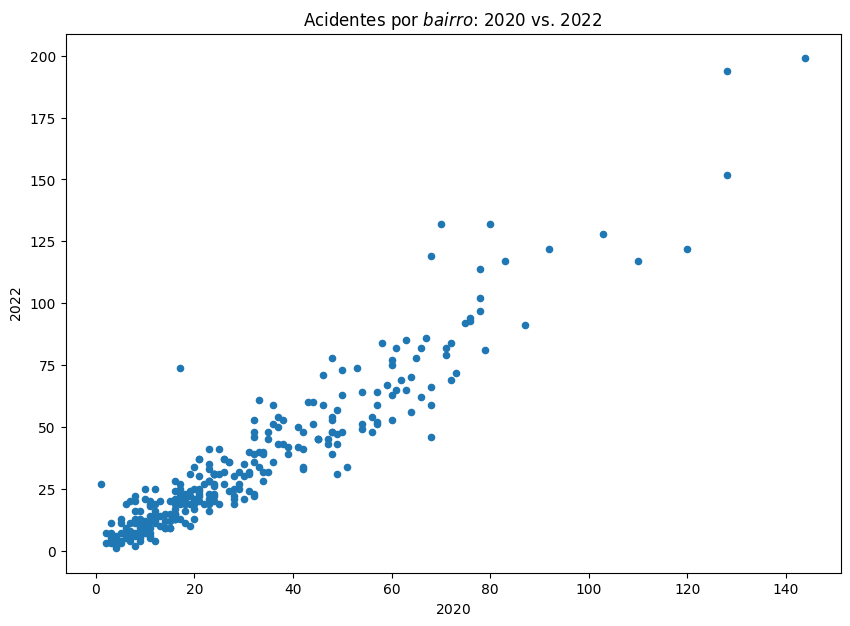

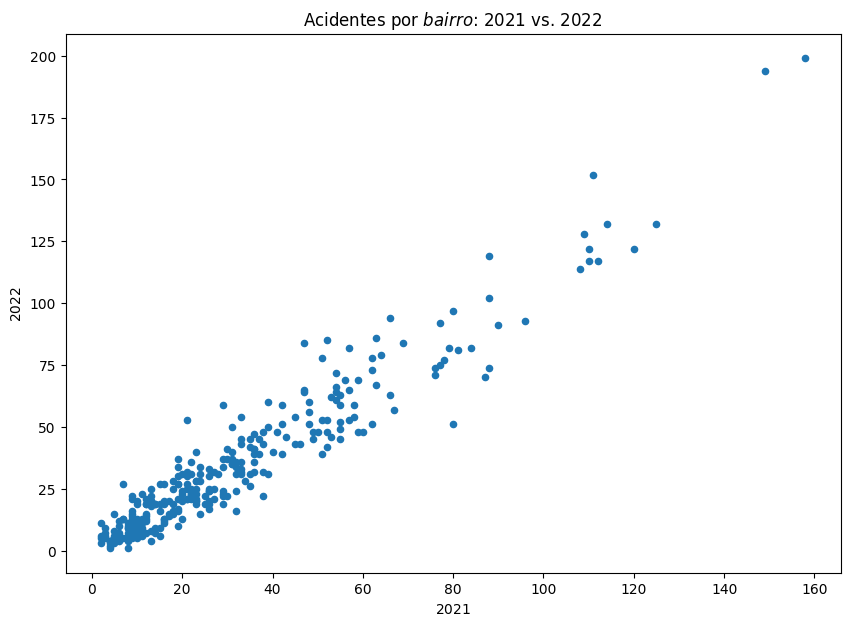

In [40]:
# Outliers: ['Jardim Montanhês', 'Centro']
# Vamos plotar os gráficos tirando os outliers da base

for dataFrame, year in zip(dataFrames, especificYears):
    merged_ano = juntar(dataFrame, dados_2022, 'bairro').reset_index()
    # Tiramos o primeiro outlier
    semOutliers1 = merged_ano[merged_ano.get('bairro') != 'Jardim Montanhês']
    # Tiramos o segundo outlier
    semOutliers = semOutliers1[semOutliers1.get('bairro') != 'Centro']
    plotarScatter(semOutliers, year, lastYear, 'bairro')


Como se torna perceptível nos gráficos, os outliers constantes (perceptívelmente maiores em todos os anos) foram retirados, com todos os valores se mantendo entre 0 e 200, permitindo uma visualização melhor dos dados

**10. Use o Número de Acidentes por bairro de 2019 para Prever 2022**

Recapitulando, para podermos fazer uma previsão, o primeiro passo é observar o diagrama de dispersao entre nossas variáveis, o que ja foi feito na questão anterior, mas, para melhorar nossa observação, plotaremos o gráfico novamente. Em seguida, temos que descobrir nosso "r" (coeficiente de correlação). Após isso, para finalizar nossa previsão, nós iremos fazer a regressão linear e encontrar a melhor reta que envolve as nossas variáveis. Faremos todosd os passos anteriores para os pares de anos e, por fim, iremos prever os acidentes de 2023.

In [41]:
# Inicialmente, vamos reunir todas as funções das quais precisamos:

def padronizando(aux):
  '''Deixa aux em unidades padronizadas'''

  return (aux - aux.mean()) / np.std(aux)

def calculate_r(df, x, y):
  '''Calcula o coeficiente r com base em duas unidades padronizadas'''

  x_padrao = padronizando(df.get(x))
  y_padrao = padronizando(df.get(y))
  return (x_padrao * y_padrao).mean()

# Agora vamos calcular a nossa reta

def parametro_a(df, x, y):
  '''Calcula o parâmtro a com base no coeficiente r'''
  r = calculate_r(df, x, y)
  return r * np.std(df.get(y)) / np.std(df.get(x))

def parametro_b(df, x, y):
  '''Calcula o parâmtro b com base no coeficiente r'''

  return df.get(y).mean() - parametro_a(df, x, y) * df.get(x).mean()

def reta_regressao(num_acidentes, a, b):
  '''Calcula a reta aproximada do histograma de regressão'''
  return b + (a * num_acidentes)

def regressao(merged_ano1, previstos):
  '''Realiza todo o processo necessário na regressão, criando um df com o valor real e o previsto'''

  # Calculando o r
  coeficiente = calculate_r(merged_ano1, '0_x', '0_y')

  # Parametros
  a = parametro_a(merged_ano1, '0_x', '0_y')
  b = parametro_b(merged_ano1, '0_x', '0_y')

  len_merged = merged_ano1.shape[0]

  novo_df = np.array([])

  for i in range(len_merged):
    num = merged_ano1.take([i]).get('0_x')
    previsao = reta_regressao(num, a, b)
    novo_df = np.append(novo_df, int(previsao))

  # Aqui, ele está adicionando a coluna dinamicamente. Essa parte, tivemos que pesquisa, pois
  # o código estava com um problema em que sobreescrevia a coluna acidente em cada loop.
  merged = merged_ano1.assign(
      **{previstos: novo_df}
  )

  return merged

  # Vamos usar ainda as funções 'juntar' e 'plotMerged', usadas na questão 9

def calculoErro(merged, base, dado):
  '''Calcula a margem de erro de um modelo de previsão, com base na média das distâncias entre valor predito e valor real'''

  len_merged = merged.shape[0]
  erro = np.array([])
  for i in range (len_merged):
    conta = abs(merged.take([i]).get('0_y') - merged.take([i]).get('previstos_2022'))
    erro = np.append(erro, conta)

  erro = erro.mean()
  print(f'A margem de erro do modelo de predição com base {base} é de aproximadamente {round(erro, 2)} {dado} pra mais ou pra menos')

def plotEficiencia(merged, ano):
  bairros = merged.get('bairro')

  plotando = bpd.DataFrame().assign(
      coluna = np.array(['real','previsto']))

  plotando = plotando.set_index('coluna')

  for bairro in bairros:
    quantReal = merged[merged.get('bairro') == bairro].get('0_y').values[0]
    quantPrevista = merged[merged.get('bairro') == bairro].get('previstos_2022').values[0]
    plotando = plotando.assign(**{bairro: [quantReal, quantPrevista]})

  plotando.plot(
      title = f'Como o modelo funcionou? (em relação a ${ano}$)',
      figsize = (10,8),
      kind='line',
      xlabel='Comparação',
      ylabel = 'Quantidade',
      legend = False
  )


#buscando implementar um grafico que mostrasse os numeros das colunas comparadas, criamos a seguinte função
#para realizá-la, tivemos que dar uma pesquisada sobre os recursos da biblioteca matplotlib

def comparacao_linhas (merged):
    colunas = merged[['0_y', 'previstos_2022']]

    # Cria uma nova figura e eixo
    fig, eixo = plt.subplots(figsize=(15, 6))

    # descobrimos que ha jeitos rapidos de colocara a cor e o jeito da linha que se deseja
    #nesse caso estamso usando 'b-', que é uma linha da cor verde
    eixo.plot(colunas.index, colunas['0_y'], 'g-', label='0_y')
    eixo.set_xlabel('Índice')


    # Plota a segunda coluna como pontos, no caso, pontos vermelhos, definidos com 'ro'
    eixo.plot(colunas.index, colunas['previstos_2022'], 'ro', label='previstos_2022')
    eixo.legend(loc='upper left')
    plt.title('Comparação entre 0_y e previstos_2022')
    plt.grid(True)
    plt.show()

- Dados de 2019 para prever 2022:

Inicialmente, tivemos uma decisão a tomar, utilizar a nossa bsae de dados completa, ou retirar os outliers. Para decidir isso, nós testamos em qual caso nossa reta de regressão fica melhor, ou seja, contempla mais dos nossos dados e, consequentemnete, apresentaria um erro menor, afinal, sabemos que a nossa reta é extremamente sensível a valores extremos, então, partimos para os testes.

Buscando não bagunçar nosso código, testamos previamente as margens de erro de previsão para cada ano, com e sem os outliers e observamos que os dados sem extremos tiveram um erro um pouco menor, menos em 2020, mas como veremos adiante, 2020 foi um caso a parte por conta da pandemia.

Por conta disso, decidimos usar a nossa base de dados sem outliers, visando minizar os erros, além de melhorar, e muito, a visualização dos nossos gráficos (chegamos a essa conclusão na questao anterior).

OBS: vale ressaltar que visamos tirar os outliers comuns a todos os anos, para que nosso dados não fossem bagunçados e nosso modelo de regressão não fosse prejudicado.

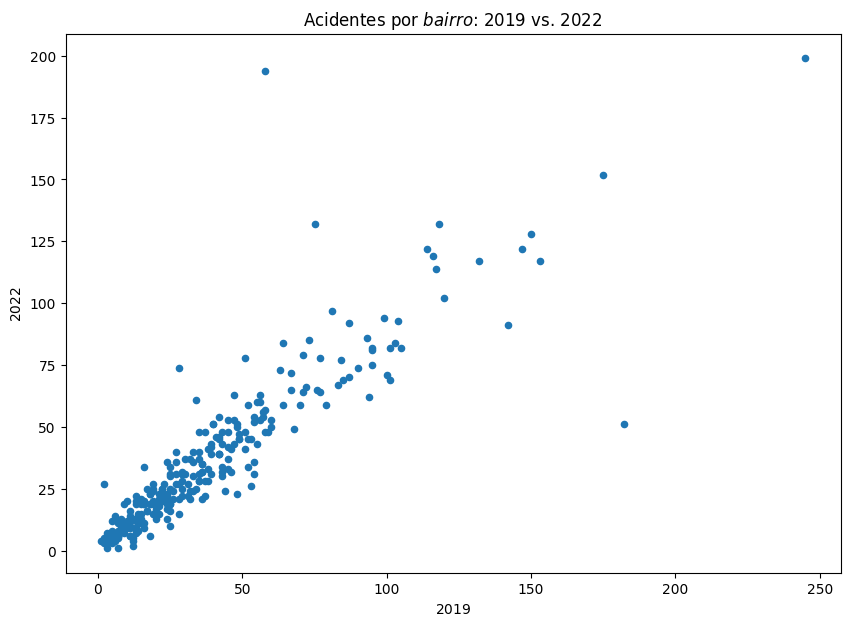

In [42]:
teste_2019 = juntar(dados_2019, dados_2022, 'bairro').reset_index()
semOutliers_2019 = teste_2019[teste_2019.get('bairro') != 'Jardim Montanhês']
semOutliers2_2019 = semOutliers_2019[semOutliers1.get('bairro') != 'Centro']
plotarScatter(semOutliers2_2019, 2019, 2022, 'bairro')

Agora, vamos aplicar a regressão e adicionar em nosso df a coluna com os respectivos dados da nossa previsão:

In [43]:
semOutliers2_2019 = regressao(semOutliers2_2019, 'previstos_2022')
semOutliers2_2019

index                bairro ano_x 0_x ano_y 0_y  previstos_2022
0        0            Aarão Reis  2019  47  2022  63            43.0
1        1               Acaiaca  2019  11  2022  12            14.0
2        2              Adelaide  2019  39  2022  31            36.0
3        3    Alto dos Pinheiros  2019  19  2022  24            20.0
4        4        Alípio de Melo  2019  35  2022  31            33.0
..     ...                   ...   ...  ..   ...  ..             ...
286    286               Vitória  2019  19  2022  19            20.0
287    287  Vitória da Conquista  2019   7  2022   6            10.0
288    288      Washington Pires  2019   5  2022   8             9.0
289    289       Álvaro Camargos  2019  10  2022  12            13.0
290    290        Átila de Paiva  2019  77  2022  78            67.0

[289 rows x 7 columns]

- Buscando conseguir visualizar ainda mais a diferença dos resultados do nosso modelo, plotamos os dois gráficos a seguir. O primeiro compara cada valor do modelo com o real, ligando-os com uma reta, já o segundo mostra, em cores diferentes a posição de cada um dos valores de acidentes respectivos aos bairros. Faremos a mesma análise para todos os outros anos (menos de 2023, afinal não temos os dados reais para realizara  comparação).

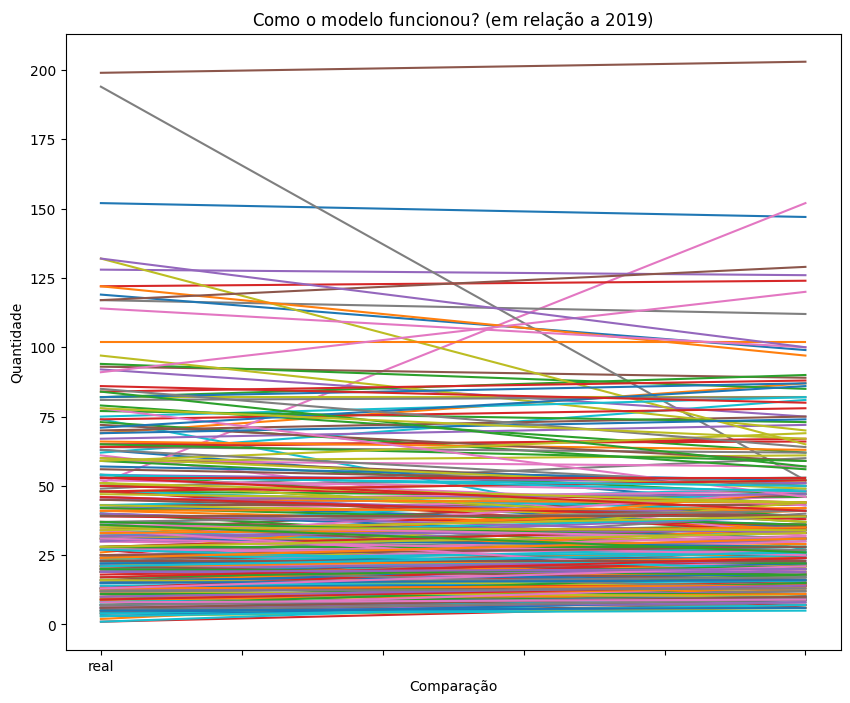

In [44]:
plotEficiencia(semOutliers2_2019, '2019')
# O início da linha é o valor real. O seu fim é o valor previsto.

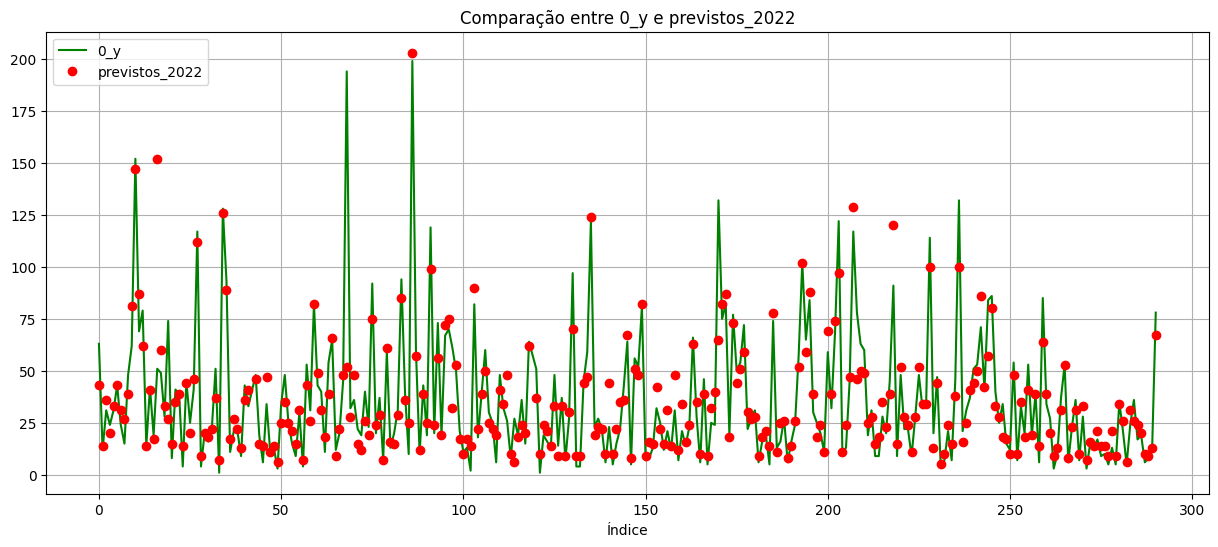

In [45]:
comparacao_linhas(semOutliers2_2019)

Por fim, vamos observar o nosso gráfico de dispersão com a nossa reta de regressão.

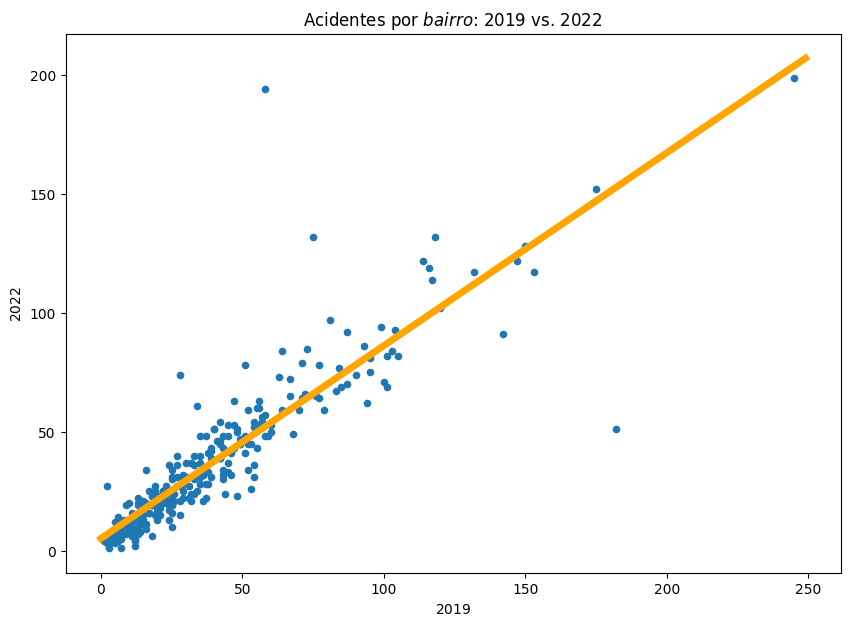

In [46]:
a_2019 = parametro_a(semOutliers2_2019, '0_x', '0_y')
b_2019 = parametro_b(semOutliers2_2019, '0_x', '0_y')

xs = np.arange(0, 250)
ys = reta_regressao(xs, a_2019, b_2019)

plotarScatter(semOutliers2_2019, 2019, 2022, 'bairro')

plt.plot(xs, ys, color='orange', lw=5, label='regression line')


In [47]:
calculoErro(semOutliers2_2019, 'em 2019', 'acidentes')

A margem de erro do modelo de predição com base em 2019 é de aproximadamente 7.33 acidentes pra mais ou pra menos


Vale ressaltar que repetiremos os mesmos passos de análise para os próximos anos.

- Dados de 2020 para prever 2022:

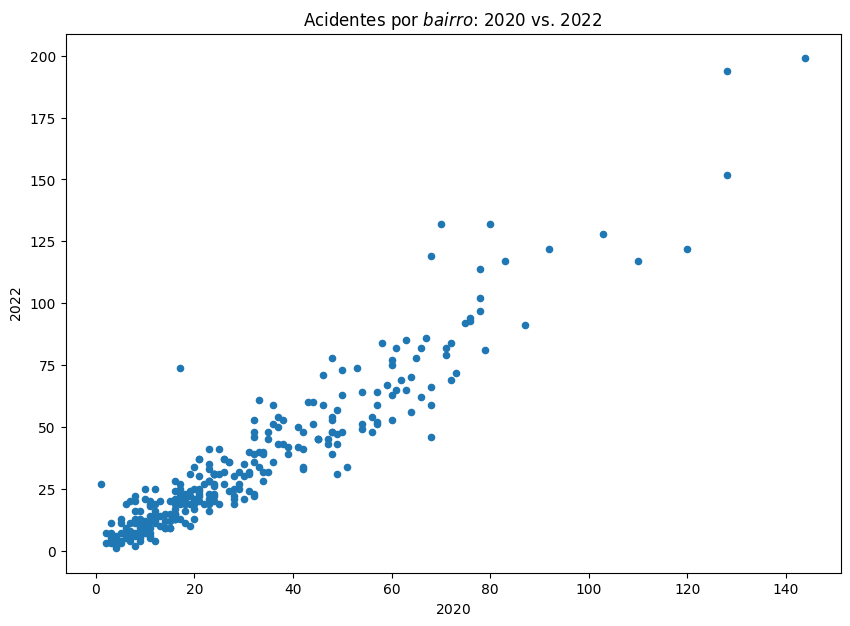

In [48]:
teste_2020 = juntar(dados_2020, dados_2022, 'bairro').reset_index()
semOutliers_2020 = teste_2020[teste_2020.get('bairro') != 'Jardim Montanhês']
semOutliers2_2020 = semOutliers_2020[semOutliers1.get('bairro') != 'Centro']
plotarScatter(semOutliers2_2020, 2020, 2022, 'bairro')

In [49]:
semOutliers2_2020 = regressao(semOutliers2_2020, 'previstos_2022')
semOutliers2_2020

index                bairro ano_x 0_x ano_y 0_y  previstos_2022
0        0            Aarão Reis  2020  60  2022  63            70.0
1        1               Acaiaca  2020  10  2022  12            10.0
2        2              Adelaide  2020  25  2022  31            28.0
3        3    Alto dos Pinheiros  2020  16  2022  24            18.0
4        4        Alípio de Melo  2020  24  2022  31            27.0
..     ...                   ...   ...  ..   ...  ..             ...
286    286               Vitória  2020  25  2022  19            28.0
287    287  Vitória da Conquista  2020   6  2022   6             6.0
288    288      Washington Pires  2020   9  2022   8             9.0
289    289       Álvaro Camargos  2020  12  2022  12            13.0
290    290        Átila de Paiva  2020  65  2022  78            76.0

[289 rows x 7 columns]

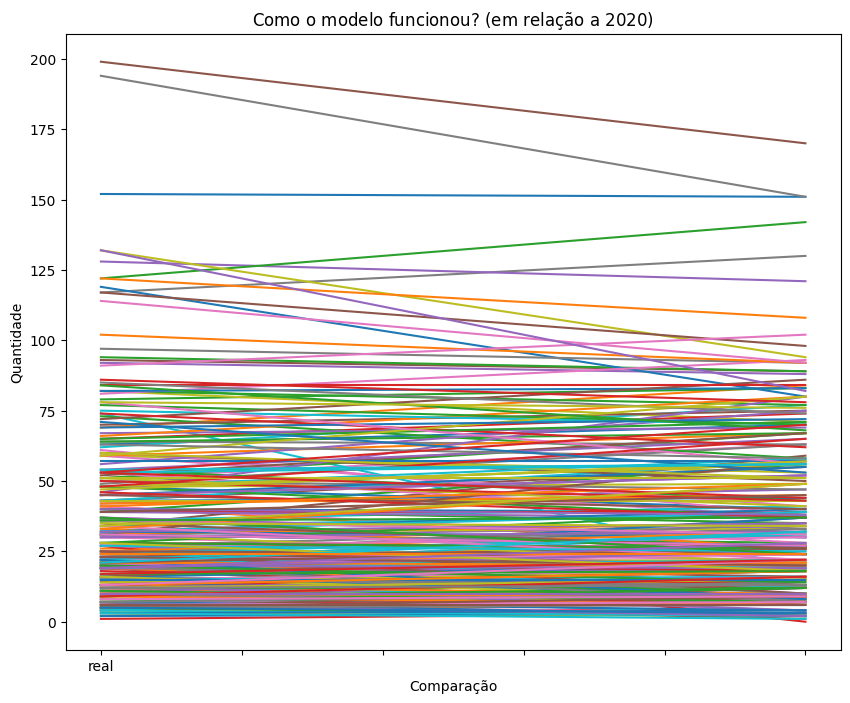

In [50]:
plotEficiencia(semOutliers2_2020, '2020')
# O início da linha é o valor real. O seu fim é o valor previsto.

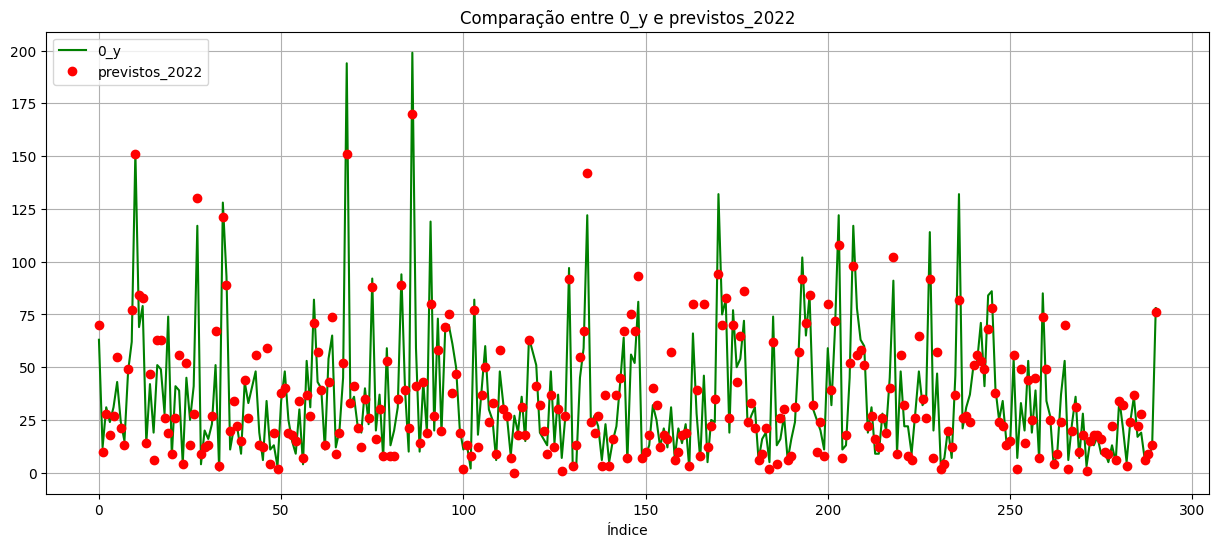

In [51]:
comparacao_linhas(semOutliers2_2020)

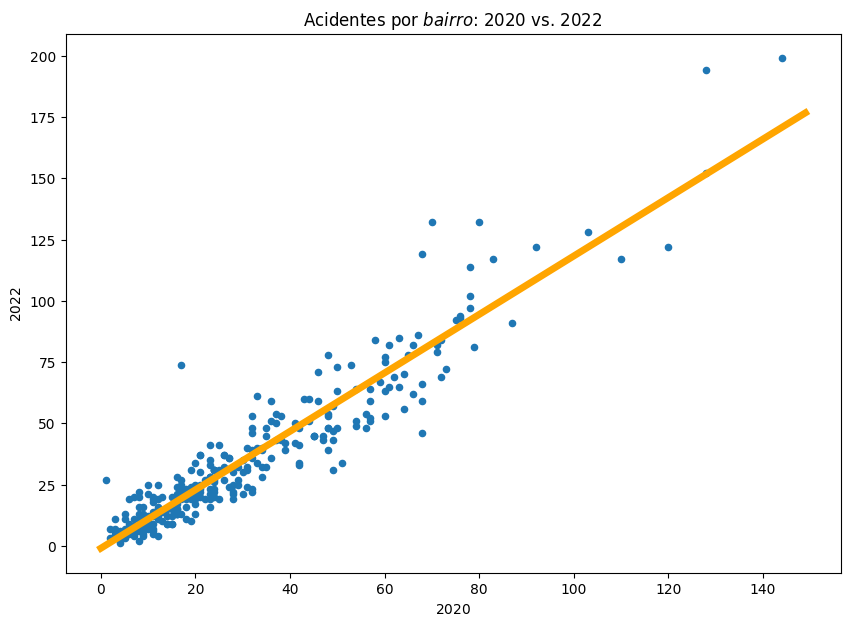

In [52]:
a_2020 = parametro_a(semOutliers2_2020, '0_x', '0_y')
b_2020 = parametro_b(semOutliers2_2020, '0_x', '0_y')

xs = np.arange(0, 150)
ys = reta_regressao(xs, a_2020, b_2020)

plotarScatter(semOutliers2_2020, 2020, 2022, 'bairro')

plt.plot(xs, ys, color='orange', lw=5, label='regression line')


In [53]:
calculoErro(semOutliers2_2020, 'em 2020', 'acidentes')

A margem de erro do modelo de predição com base em 2020 é de aproximadamente 7.25 acidentes pra mais ou pra menos


In [54]:
# Comparando quantidade de acidentes de cada ano
df.groupby('ano').size()

ano
2016    11185
2017    11095
2018    10420
2019    11890
2020     9661
2021    10162
2022    11206
dtype: int64

Através dos resultados dos gráficos e também da comparação feita acima, podemos observar que houve uma queda considerável do número de acidentes em 2020. Inclusive, vemos que o erro do nosso modelo também foi maior. Isso se deve ao momento vivenciado naquele ano, a Pandemia de Covid-19, a qual fez com que o fluxo de trânsito diminuísse de modo a impactar positivamente no número de acidentes. Ainda que tenha sido um momento difícil e trágico, tal fato causou a redução no número de acidentes em 2020.

- Dados de 2021 para prever 2022:

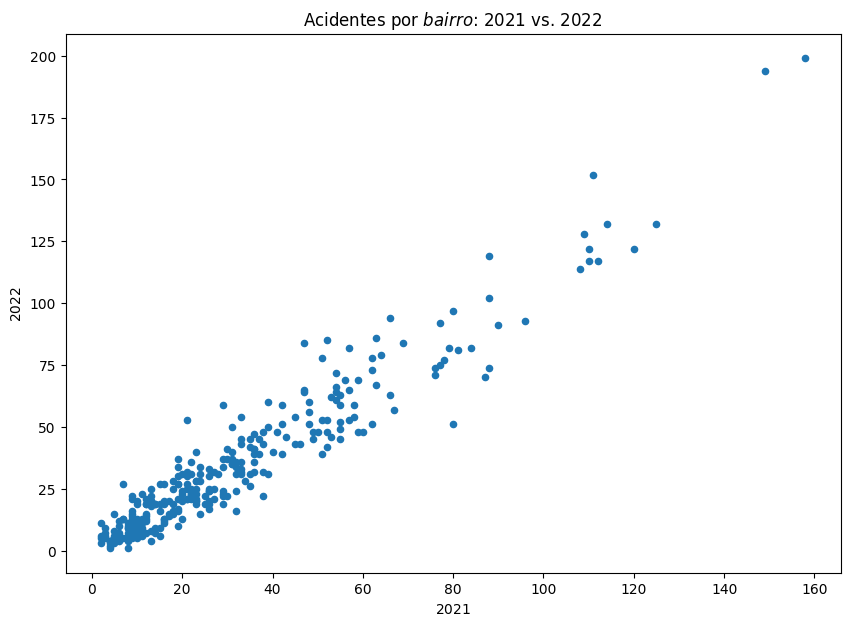

In [55]:
teste_2021 = juntar(dados_2021, dados_2022, 'bairro').reset_index()
semOutliers_2021 = teste_2021[teste_2021.get('bairro') != 'Jardim Montanhês']
semOutliers2_2021 = semOutliers_2021[semOutliers1.get('bairro') != 'Centro']
plotarScatter(semOutliers2_2021, 2021, 2022, 'bairro')

In [56]:
semOutliers2_2021 = regressao(semOutliers2_2021, 'previstos_2022')
semOutliers2_2021

index                bairro ano_x 0_x ano_y 0_y  previstos_2022
0        0            Aarão Reis  2021  66  2022  63            72.0
1        1               Acaiaca  2021  16  2022  12            17.0
2        2              Adelaide  2021  35  2022  31            38.0
3        3    Alto dos Pinheiros  2021  26  2022  24            28.0
4        4        Alípio de Melo  2021  39  2022  31            43.0
..     ...                   ...   ...  ..   ...  ..             ...
286    286               Vitória  2021  16  2022  19            17.0
287    287  Vitória da Conquista  2021  11  2022   6            12.0
288    288      Washington Pires  2021   5  2022   8             5.0
289    289       Álvaro Camargos  2021   6  2022  12             6.0
290    290        Átila de Paiva  2021  51  2022  78            56.0

[289 rows x 7 columns]

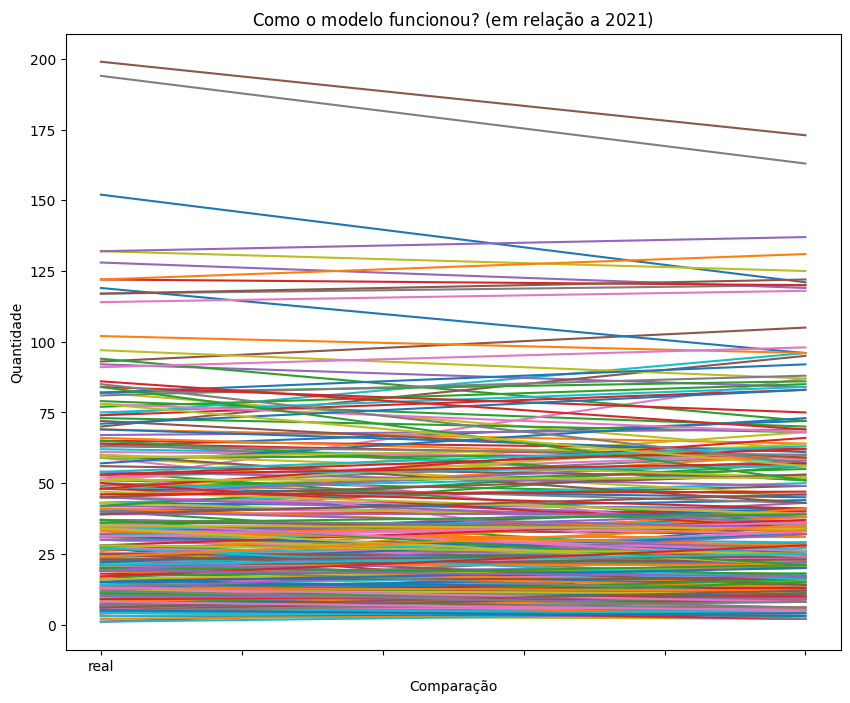

In [57]:
plotEficiencia(semOutliers2_2021, '2021')
# O início da linha é o valor real. O seu fim é o valor previsto.

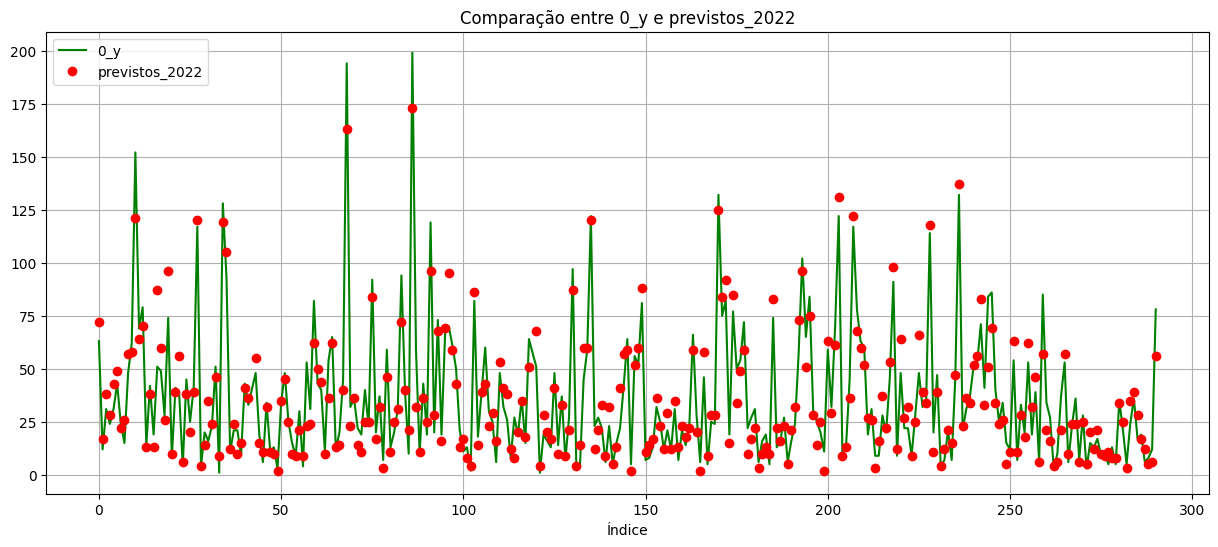

In [58]:
comparacao_linhas(semOutliers2_2021)

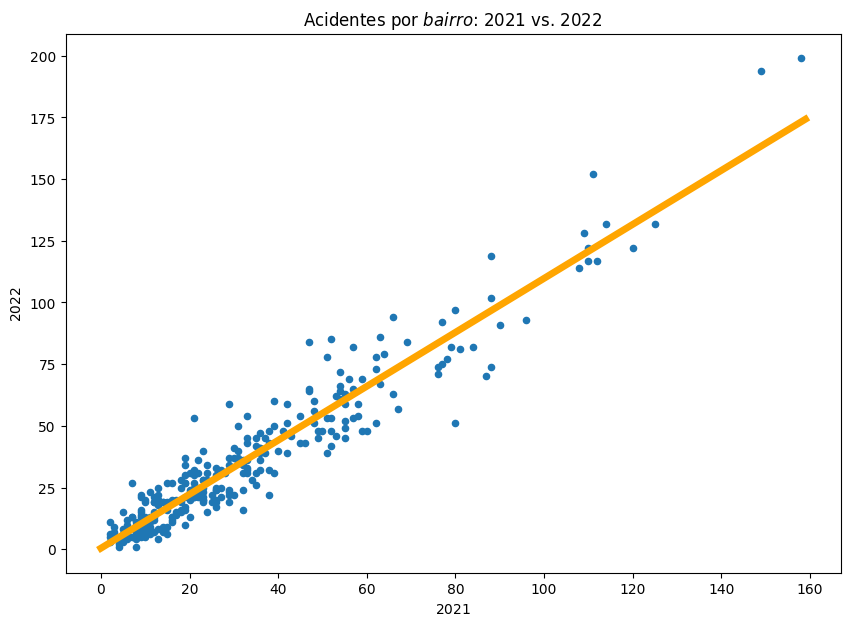

In [59]:
a_2021 = parametro_a(semOutliers2_2021, '0_x', '0_y')
b_2021 = parametro_b(semOutliers2_2021, '0_x', '0_y')

xs = np.arange(0, 160)
ys = reta_regressao(xs, a_2021, b_2021)

plotarScatter(semOutliers2_2021, 2021, 2022, 'bairro')

plt.plot(xs, ys, color='orange', lw=5, label='regression line')

In [60]:
calculoErro(semOutliers2_2021, 'em 2021', 'acidentes')

A margem de erro do modelo de predição com base em 2021 é de aproximadamente 6.86 acidentes pra mais ou pra menos


<Axes: xlabel='Ano', ylabel='Taxa de erro'>

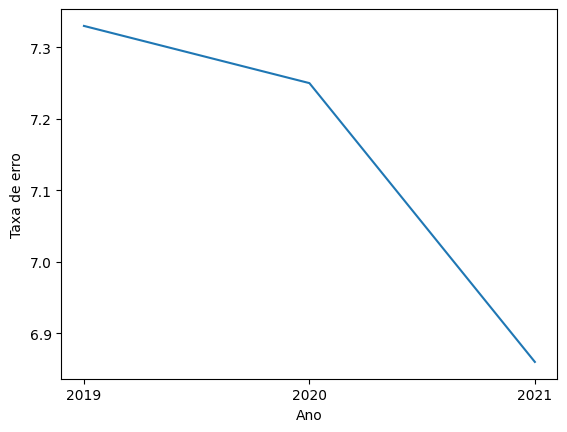

In [61]:
# Como a taxa de erros funciona quando vamos nos distanciando do ano que queremos prever?

anos = np.array([2019,2020,2021])
taxasErros = np.array([7.33, 7.25, 6.86])

modelo2022 = (
  bpd.DataFrame()
  .assign(
      Ano = anos,
      taxa_de_erro = taxasErros
  )
  .set_index('Ano')
)


modelo2022.plot(
    kind = 'line',
    legend = False,
    ylabel = 'Taxa de erro',
    xticks = anos
)

Essa taxa de erro mostra quantos acidentes para mais ou para menos temos em média em relação ao previsto.

Como se torna perceptível, a menor taxa de erro ocorreu quando utilizamos 2021 para prever 2022. Com isso, concluímos que quanto mais próximo do ano que queremos prever, melhor nossa "amostra de previsão".

Além disso, devemos ressaltar que, apesar de baixa - considerando a quantidade total do que está sendo mensurado - a taxa de erro nunca chegará a zero, uma vez que é improvável que a variação de acidentes em todos os bairros siga uma mesma regra, considerando que a ocorrência desses acidentes depende de uma série de fatores, tais como responsabilidade de motoristas, desantenções momentâneas, acidentes ambientais e demais variáveis que são muito difíceis de serem previstas. Com isso, a principal limitação de qualquer modelo é nunca conseguir prever exatamente o que irá acontecer. Entretanto, em circunstâncias normais, a quantidade de acidentes em um ano nos bairros não tende a variar tanto, considerando que em pequenos intervalos o fluxo de carros e pessaos se mantem constante. Assim, nosso modelo é extremamente útil para a realização de ações que possam ser necessárias a fim de se prevenir alguns acidentes, permitindo a identificação dos bairros mais afetados e a tomada das devidas providências.

Agora, com base nos modelos criados, iremos prever os números de acidentes em 2023. Para isso, inicialmente, analisamos e decidimos usar o modelo de 2021 usado para prever 2022, uma vez que sua taxa de erro foi a menor. Então, utilizando da reta de regressão criada, e usufruindo dos dados reais de 2022, vamos prever os números de 2023:

In [78]:
#visando melhorar nossa visualização, vamos criar um df apena com as colunas necessarias:
dados_21_22 = semOutliers2_2021.get([ 'bairro','0_x','0_y'])

In [81]:
# nossa reta é do tipo ax + b, então vamos começar calculando nossos parametros a e b:
a_2021 = parametro_a(dados_21_22,'0_x', '0_y')
b_2021 = parametro_b(dados_21_22,'0_x', '0_y')

#agora, vamos criar um loop, chamando nossa função 'reta_regresssao' em cada linha do df

novo_df = np.array([])
len_merged_2021 = dados_21_22.shape[0]

for i in range(len_merged_2021):
  num = dados_21_22.take([i]).get('0_y')
  previsao = reta_regressao(num, a_2021, b_2021)
  novo_df = np.append(novo_df, int(previsao))

#agora, apenas para mudar o nome das nossas colunas e ter o df que queremos, fizemos o seguinte:

coluna_2022 = dados_21_22.get('0_y')
coluna_bairros = dados_21_22.get('bairro')
previstos_2023 = bpd.DataFrame().assign(

    **{'bairro': coluna_bairros},
    **{'valores_2022': coluna_2022},
    **{'previsao_2023': novo_df}

  )

previstos_2023

bairro valores_2022  previsao_2023
0              Aarão Reis           63           69.0
1                 Acaiaca           12           13.0
2                Adelaide           31           34.0
3      Alto dos Pinheiros           24           26.0
4          Alípio de Melo           31           34.0
..                    ...          ...            ...
286               Vitória           19           21.0
287  Vitória da Conquista            6            6.0
288      Washington Pires            8            9.0
289       Álvaro Camargos           12           13.0
290        Átila de Paiva           78           85.0

[289 rows x 3 columns]

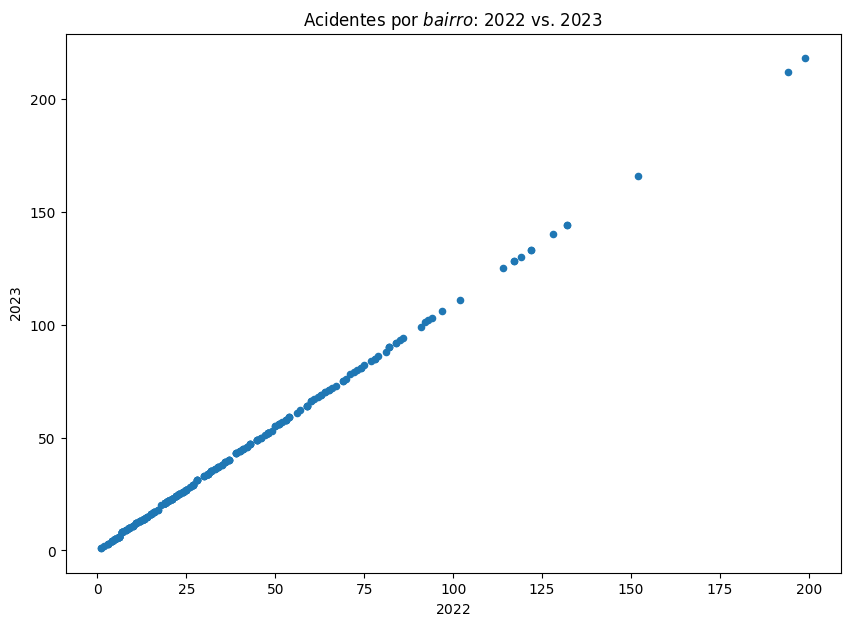

In [82]:
# Como fica nossa dispersão prevista

dfplot = bpd.DataFrame().assign(
    **{'0_x': previstos_2023.get('valores_2022')},
    **{'0_y': previstos_2023.get('previsao_2023')}
)
plotarScatter(dfplot, 2022, 2023, 'bairro')

Como podemos perceber, os pontos formam uma reta (a reta de regressão). A previsão não é exata, uma vez que sabemos que nosso modelo possui uma média de erro diferente de zero. Entretanto, a execução dessa previsão permite uma noção de quantos acidentes teremos/tivemos no ano de 2023.

In [83]:
# Quantidade total de acidentes de 2023
previstos_2023.get('previsao_2023').sum()


11402.0

**11. Fazer Análises Adicionais de Interesse**

Pensamos em 6 análises interessantes a serem feitas para além das propostas anteriormente. Sequem as perguntas

Há um aumento de frequência perceptível e relevante em algum tipo de acidente específico entre 2016 e 2022?

---



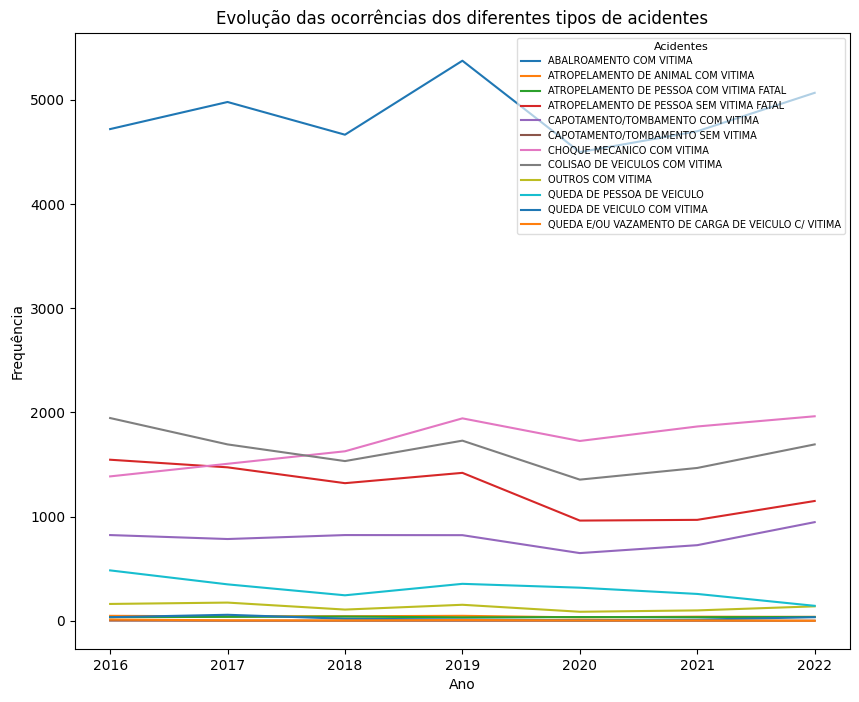

In [84]:
# Definindo novamente anos
anos = df.groupby('ano').size().index

agrupadoProv = df.groupby(['desc_tipo_acidente', 'ano']).size().reset_index()
agrupado = pd.DataFrame(agrupadoProv.values, columns=['desc_tipo_acidente', 'ano', 'size'])
tiposAcidentes = agrupado.groupby(['desc_tipo_acidente']).size().index

paraPlotar = bpd.DataFrame().assign(ano = anos).set_index('ano')

for acidente in tiposAcidentes:
  especific = np.array(agrupado[agrupado.get('desc_tipo_acidente') == acidente].get('size'))

  # Se não tiver 2 elementos no array(quant de anos) devo adicionar os 0
  if len(especific) < 7:
    for i in range(7 - len(especific)):
      especific = np.append(especific,0)

  # Aqui, ele está adicionando a coluna dinamicamente. Essa parte, tivemos que pesquisa, pois
  # o código estava com um problema em que sobreescrevia a coluna acidente em cada loop.

  paraPlotar = paraPlotar.assign(**{acidente: especific})

paraPlotar.plot(
    title = 'Evolução das ocorrências dos diferentes tipos de acidentes',
    figsize = (10,8),
    kind='line',
    xlabel='Ano',
    ylabel = 'Frequência'
)

plt.legend(
    loc ='upper right',
    fontsize=7,
    title='Acidentes',
    title_fontsize = 8,
    framealpha=0.65 #transparência
)

Como percebemos, há um aumento de todos os casos em 2019 e uma diminuiçõa em 2020 (afetada pela pandemia). Entretanto, os acidentes crescem e decrescem proporcionamente, sem nenhum aumento alarmante de um tipo específico. O que chama a atenção é a quantidade exorbitante de acidentes do tipo Abaloramento com Vítima, que se destaca em comparação aos outros ao longo do tempo.

Plotando histogramas com variáveis categóricas

---



Ao realizarmos a questão número 1, observamos que existiam várias variáveis categoricas ao longo do nosso df, portanto, visando ter uma melhor visualização dos dados a elas relacionados. Ao analisar nossa base de dados, percebemos as seguintes variáveis interessantes: ** 'desc_tipo_acidente' e 'desc_regional' **


- Vamos começar analisandoos tipos de acidentes e suas ocorrencias ao longo dos anos:

<Axes: title={'center': 'Frequência de cada tipo de acidente ao longo dos anos'}, xlabel='Frequência', ylabel='Descrição do acidente'>

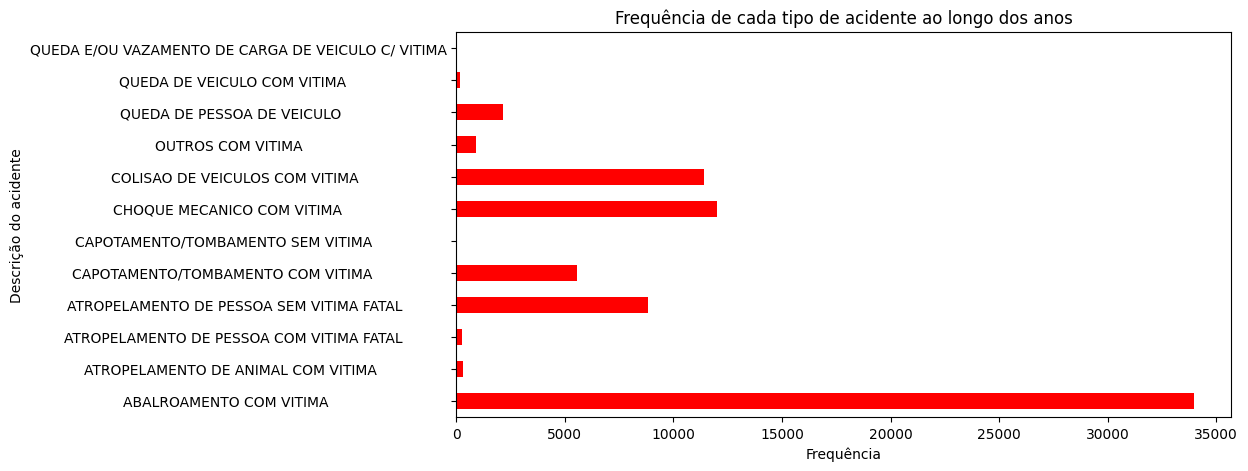

In [85]:
df_acidentes = df.groupby('desc_tipo_acidente').size()
df_acidentes.plot( kind='barh', color='red',
    ylabel = 'Descrição do acidente',
    xlabel = 'Frequência',
    title = 'Frequência de cada tipo de acidente ao longo dos anos',
    legend = False,
    figsize = (10,5))

- Agora, vamos analisar a variável regional:

<Axes: title={'center': 'Frequência de acidentes por regional'}, xlabel='Frequência', ylabel='Regional'>

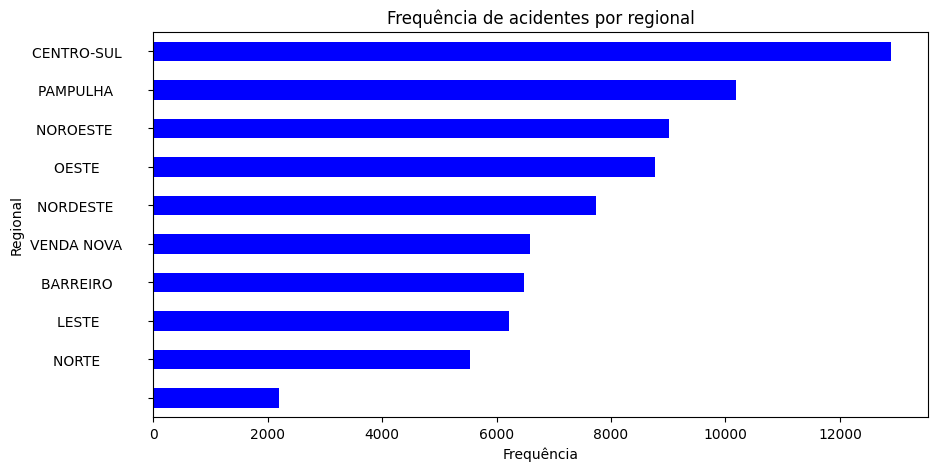

In [86]:
df_acidentes = df.groupby('desc_regional').size().sort_values()
df_acidentes.plot( kind='barh', color='blue',
    ylabel = 'Regional',
    xlabel = 'Frequência',
    title = 'Frequência de acidentes por regional',
    legend = False,
    figsize = (10,5))

Através dessa análise, podemos observar que a região centro-sul apresenta o maior número de acidentes ao longo dos anos, fato que é explicado por ser a região com maior fluxo de pessoa diárias, por concentrar grande número também de empresas e serviços.

Reinterando o dados obtidos pela questao 6, os bairros com mais acidentes são: Funcionários, Centro e Jardim Japonês. Assim, quais os
tipos de acidentes mais comuns em cada um desses bairros?

---

- Funcionários:

<Axes: title={'center': 'Tipos de acidentes mais frequentes no Funcionários'}, xlabel='Frequência', ylabel='Descrição'>

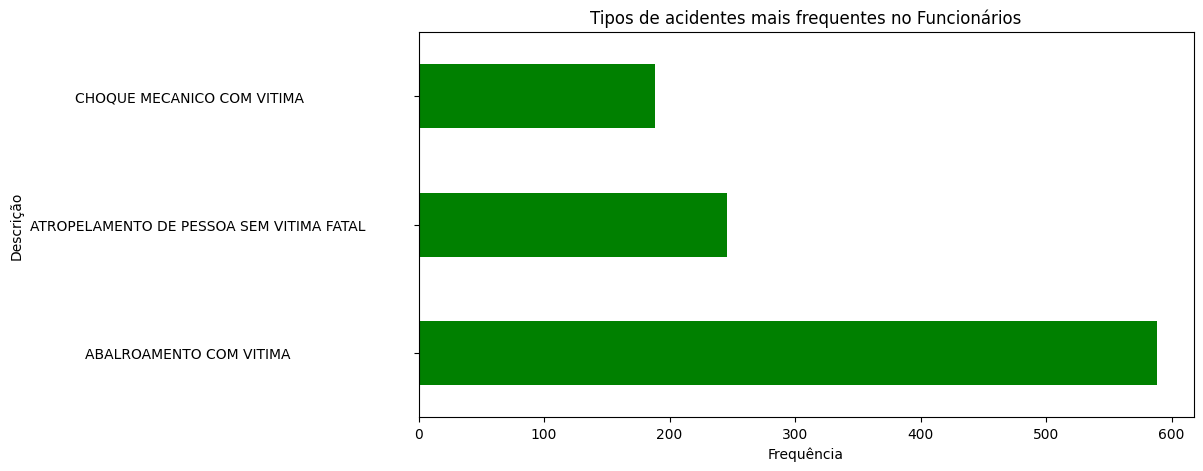

In [87]:
bairro_funcionários = df[df.get('bairro') == 'Funcionários']
bairro_funcionários = bairro_funcionários.groupby('desc_tipo_acidente').size().sort_values(ascending = False).iloc[range(3)]
bairro_funcionários.plot(kind = 'barh', color='green',
    ylabel = 'Descrição',
    xlabel = 'Frequência',
    title = 'Tipos de acidentes mais frequentes no Funcionários',
    legend = False,
    figsize = (10,5))

- Centro:

<Axes: title={'center': 'Tipos de acidentes mais frequentes no Centro'}, xlabel='Frequência', ylabel='Descrição'>

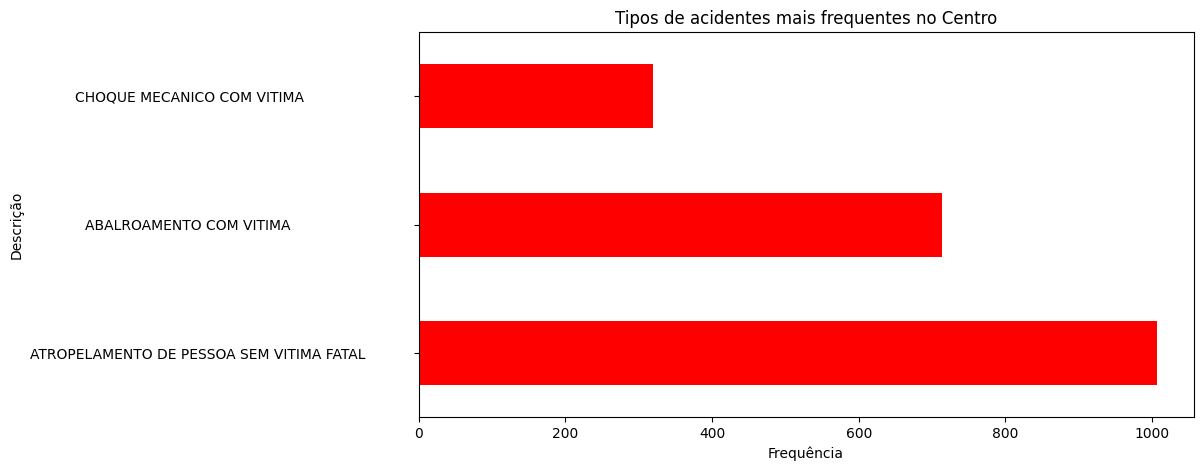

In [88]:
bairro_centro = df[df.get('bairro') == 'Centro']
bairro_centro = bairro_centro.groupby('desc_tipo_acidente').size().sort_values(ascending = False).iloc[range(3)]
bairro_centro.plot(kind = 'barh', color='red',
    ylabel = 'Descrição',
    xlabel = 'Frequência',
    title = 'Tipos de acidentes mais frequentes no Centro',
    legend = False,
    figsize = (10,5))

- Jardim Japonês

<Axes: title={'center': 'Tipos de acidentes mais frequentes no Jardim Montanhês'}, xlabel='Frequência', ylabel='Descrição'>

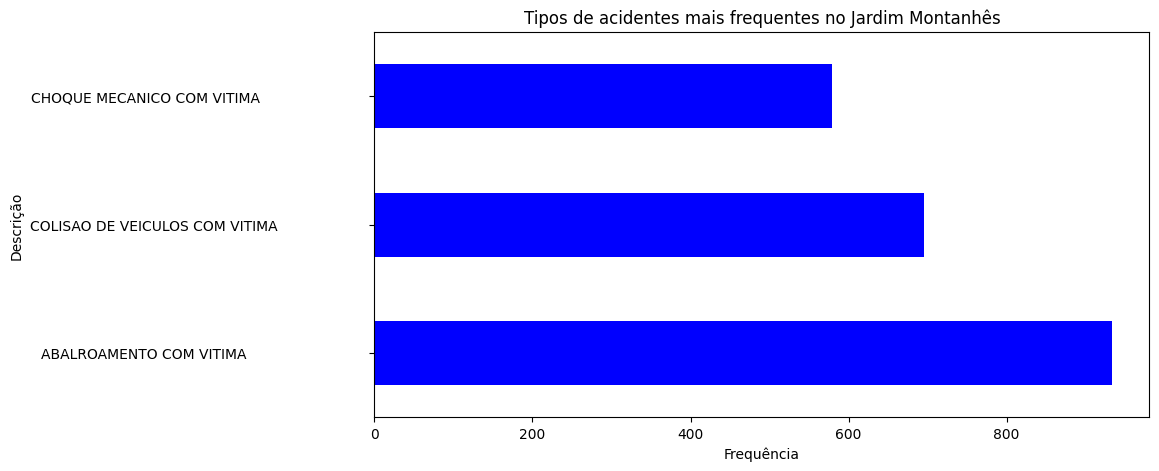

In [89]:
bairro_jardim = df[df.get('bairro') == 'Jardim Montanhês']
bairro_jardim = bairro_jardim.groupby('desc_tipo_acidente').size().sort_values(ascending = False).iloc[range(3)]
bairro_jardim.plot(kind = 'barh', color='blue',
    ylabel = 'Descrição',
    xlabel = 'Frequência',
    title = 'Tipos de acidentes mais frequentes no Jardim Montanhês',
    legend = False,
    figsize = (10,5))

Bairros mais populosos têm mais acidentes?

---



In [90]:
# Por pesquisa externa (https://bairrosdebelohorizonte.webnode.com.br) que considera dados do CENSO 2010

import babypandas as bpd
from io import StringIO

# Dados como uma string, ajustado para o formato CSV adequado
dados = """
bairro,populacao
Aarão Reis,2952
Acaba Mundo,1173
Acaiaca,2554
Ademar Maldonado,1803
Aeroporto,1325
Aguas Claras,2023
Alípio de Melo,9530
Alpes,2184
Alta Tensão 1ª Seção,397
Alta Tensão 2ª Seção,2010
Alto Barroca,5209
Alto Caiçaras,7403
Alto das Antenas,384
Alto dos Pinheiros,3191
Vera Cruz,21444
Álvaro Camargos,1080
Ambrosina,800
Anchieta,12720
Andiroba,791
Antonio Ribeiro de Abreu 1ª Seção,484
Aparecida,9804
Aparecida 7ª Seção,4917
Ápia,405
Apolonia,6568
Araguaia,14635
Atila de Paiva,1207
Bacurau,104
Bairro das Indústrias II,1033
Baleia,0
Bandeirantes,5268
Barão Homem de Melo 1ª Seção,1899
Barão Homem de Melo 2ª Seção,207
Barão Homem de Melo 3ª Seção,189
Barreiro,9188
Barro Preto,6143
Barroca,3304
Beija Flor,1258
Beira Linha,4132
Bela Vitoria,664
Belmonte,2232
Belvedere,8828
Bernadete,1515
Betânia,12024
Biquinhas,1671
Boa Esperança,546
Boa União 1ª Seção,309
Boa União 2ª Seção,177
Boa Viagem,4437
Boa Vista,17556
Bom Jesus,3605
Bonfim,4445
Bonsucesso,6360
Brasil Industrial,7030
Braúnas,1936
Buraco Quente,999
Buritis,29374
Cabana do Pai Tomás,17994
Cachoeirinha,9128
Caetano Furquim,370
Caiçara - Adelaide,10789
Caiçaras,13060
Calafate,7427
Califórnia,6076
Camargos,13047
Campo Alegre,2774
Camponesa 1ª Seção,122
Camponesa 2ª Seção,236
Canaa,2614
Canadá,492
Candelaria,7459
Capitão Eduardo,1191
Cardoso,10538
Carlos Prates,15169
Carmo,3813
Casa Branca,6338
Castanheira,5650
Castelo,17056
CDI Jatoba,169
Cenaculo,2273
Centro,16199
Céu Azul,23793
Chácara Leonina,434
Cidade Jardim,1466
Cidade Jardim Taquaril,173
Cidade Nova,15368
Cinquentenário,5456
Colégio Batista,10063
Comiteco,1738
Concórdia,10622
Cônego Pinheiro 1ª Seção,446
Cônego Pinheiro 2ª Seção,43
Confisco,4283
Conjunto Bonsucesso,1030
Conjunto Califórnia I,3347
Conjunto Califórnia II,1737
Conjunto Capitão Eduardo,2781
Conjunto Celso Machado,2696
Conjunto Floramar,916
Conjunto Jardim Filadélfia,3002
Conjunto Jatoba,3687
Conjunto Lagoa,662
Conjunto Minas Caixa,4421
Conjunto Novo Dom Bosco,704
Conjunto Paulo VI,3228
Conjunto Providencia,252
Conjunto Santa Maria,1127
Conjunto São Francisco de Assis,300
Conjunto Serra Verde,240
Conjunto Taquaril,14977
Copacabana,13293
Coqueiros,7648
Coração de Jesus,5812
Coração Eucarístico,7609
Corumbiara,952
Cruzeiro,8135
Custodinha,319
das Industrias I,9066
Delta,954
Diamante,11916
Distrito Industrial do Jatoba,644
Dom Bosco,9695
Dom Cabral,4177
Dom Joaquim,3279
Dom Silverio,4195
Dona Clara,8839
Embaúbas,1809
Engenho Nogueira,1363
Ermelinda,3432
Ernesto Nascimento,2142
Esperança,2146
Esplanada,8199
Estoril,4522
Estrela,1591
Estrela do Oriente,4706
Etelvina Carneiro,2331
Europa,10065
Eymard,3947
Fazendinha,3715
Fernão Dias,4183
Flamengo,328
Flavio De Oliveira,2872
Flavio Marques Lisboa,7859
Floramar,9624
Floresta,11728
Frei Leopoldo,1986
Funcionários,8800
Gameleira,300
Garças,930
Glória,14627
Goiania,16229
Graça,4792
Grajaú,6257
Granja de Freitas,3602
Granja Werneck,1995
Grota,195
Grotinha,447
Guarani,7717
Guaratã,766
Gutierrez,17469
Havaí,15235
Heliopolis,6660
Horto,3330
Horto Florestal,5937
Inconfidência,3457
Indaiá,3288
Independência,8334
Ipe,4687
Ipiranga,12082
Itaipu,8676
Itapoa,9475
Itatiaia,1772
Jaqueline,16180
Jaraguá,4051
Jardim Alvorada,9909
Jardim América,11145
Jardim Atlântico,1439
Jardim do Vale,1117
Jardim dos Comerciarios,21226
Jardim Felicidade,15477
Jardim Guanabara,11612
Jardim Leblon,9357
Jardim Montanhês,5949
Jardim São José,6964
Jardim Vitoria,9534
Jardinópolis,1724
Jatobá,3447
João Alfredo,391
João Paulo II,1792
João Pinheiro,9588
Jonas Veiga,2576
Juliana,5892
Lagoa,9119
Lagoinha,3810
Lagoinha Leblon,5973
Lajedo,4862
Laranjeiras,163
Leonina,3665
Leticia,7715
Liberdade,4477
Lindéia,24093
Lorena,91
Lourdes,18860
Luxemburgo,6412
"""

# Usar StringIO para simular um arquivo CSV
dados_io = StringIO(dados)

# Criar o DataFrame com babypandas
bairroPopulation = bpd.read_csv(dados_io, sep=',')


# Transformo a quantidade de população em inteiro
list = bairroPopulation.get('populacao').values
correctList = []
for num in list:
  correctList.append(int(num))

# Crio o df final, ordenado por bairros mais populosos
ofbairro = (
    bairroPopulation
    .assign(popInt = correctList)
    .drop(columns = 'populacao')
    .sort_values(by='popInt', ascending=False)
)

In [91]:
# Visualizando os 3 bairros mais populosos
ofbairro.iloc[range(3)]

bairro  popInt
55    Buritis   29374
199   Lindéia   24093
80   Céu Azul   23793

In [92]:
top3 = np.array(ofbairro.iloc[range(3)].get('bairro'))
bairros3 = bpd.DataFrame().assign(
    bairro = [],
    acidentes = []
)

for bairro in top3:
  quant = (
      df[df.get('bairro') == bairro].shape[0]
  )
  newLine = bpd.DataFrame().assign(
      bairro = [bairro],
      acidentes = [quant]
  )
  bairros3 = bairros3.append(newLine).reset_index(drop=True)

<Axes: title={'center': 'Bairros com mais acidentes'}, ylabel='bairro'>

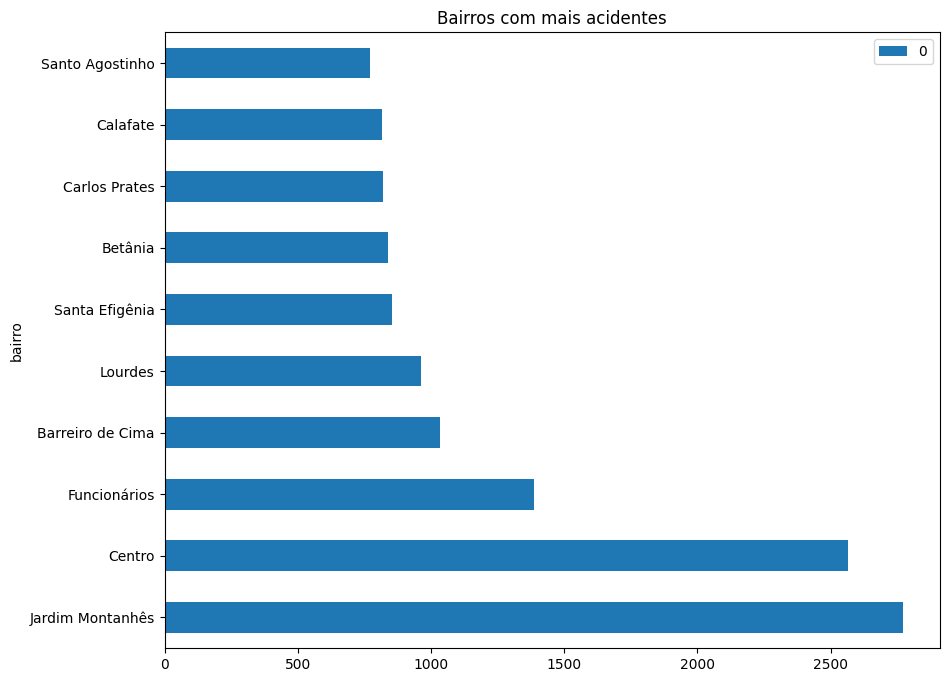

In [93]:
groupBairro = df.groupby('bairro').size().sort_values(ascending=False).reset_index()
(
    groupBairro
    .set_index('bairro')
    .iloc[range(10)]
    .plot(kind = 'barh', figsize = (10,8), title = 'Bairros com mais acidentes')
)

In [94]:
for i in bairros3.index:
  line = groupBairro[groupBairro.get('bairro') == bairros3.iloc[i].get('bairro')]
  print(line)

     bairro    0
92  Buritis  279
     bairro    0
62  Lindéia  373
      bairro    0
40  Céu Azul  465


Como percebemos, os 3 bairros mais populosos não estão nem entre os 10 com mais acidentes. Sendo que o Buritis está em 92º, Lindéia em 62º e Céu Azul em 40º. Para uma melhor visualização, vamos plotar isso em um gráfico.

<Axes: title={'center': 'Quantidade de acidentes dos bairros mais populosos'}, ylabel='bairro'>

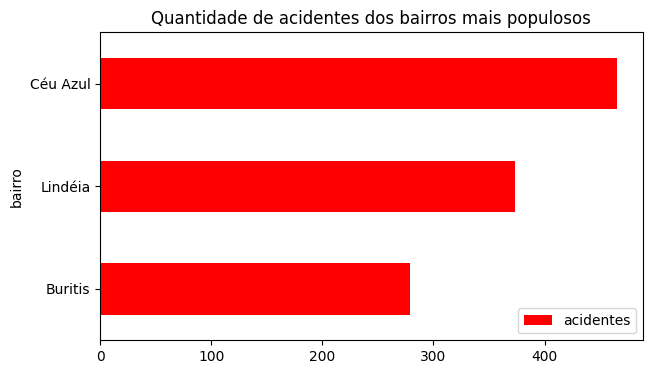

In [95]:
(
    bairros3
    .set_index('bairro')
    .plot(
        kind='barh',
        color = 'red',
        figsize = (7,4),
        title ='Quantidade de acidentes dos bairros mais populosos'
      )
)

Portanto, a ocorrência de acidentes não está ligada diretamente ao número de habitantes do local.

- Análise além dos números: Por que Jardim Montanhês e Centro são os bairros com mais acidentes? (entre 2016 e 2022)

---



Já que percebemos que o número de habitantes não afeta tanto quanto parece a ocorrência de acidentes, resolvemos fazer uma leve investigação sobre o que pode estar causando a grande quantidade de acidentes.

In [96]:
semIndex = groupBairro.reset_index()

*Jardim Montanhês*

In [97]:
# Posição em quantidade de acidentes
semIndex[semIndex.get('bairro') == 'Jardim Montanhês']

index            bairro     0
0      0  Jardim Montanhês  2770

In [98]:
# Posição em população
ofbairro[ofbairro.get('bairro') == 'Jardim Montanhês']

bairro  popInt
181  Jardim Montanhês    5949

O Jardim Montanhês é um bairro localizando na Zona Oeste de BH, sendo atravessado pelo Anel Rodoviário e abrangendo duas avenidas importantes da cidade (Presidente Tancredo Neves e Dom Pedro II). O alto fluxo de carros nessas vias contribúi para o aumento da taxa de acidentes. Como o bairro se localiza em uma área de fluxo, principalmente para quem se locomove para a região da Pampulha, por mais que não seja muito populoso, tem trânsito diário intenso, intensificando também a probabilidade de ocorrência de acidentes.


*Centro*

In [99]:
# Posição em quantidade de acidentes
semIndex[semIndex.get('bairro') == 'Centro']

index  bairro     0
1      1  Centro  2566

In [100]:
# Posição em população
ofbairro[ofbairro.get('bairro') == 'Centro']

bairro  popInt
79  Centro   16199

O Centro de Belo Horizonte, como o centro da maioria das cidades, não é um bairro residencial, mas sim um local pelo qual passamos para ir de um bairro a outro, além de ser um local em que muitos cidadãos encontram trabalho. Pensando nisso, podemos concluir que o alto fluxo de pessoas por suas ruas ocasiona muitos acidentes, por mais que não seja um dos bairros mais populosos de BH.
